# Projet 5 : Segmentez des clients d'un site e-commerce

## Présentation des Données

la description des donnes 

###  Importation Des Librairies

In [126]:
from IPython.display import display, Markdown
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import folium
from tqdm import tqdm
import missingno as msno
import re 
from sklearn.preprocessing import MinMaxScaler

### La Table Clients 

In [2]:
Clients = pd.read_csv('olist_dataset.csv/olist_customers_dataset.csv')
Clients.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
Clients.shape

(99441, 5)

- **la Dimension de la Table Client est (99441 lignes et 5 Colonnes)**

- **est ce qu'on a des doublons?** 

In [4]:
print(Clients['customer_id'].duplicated().sum())

0


- **Le Nombre total des clients correspond exactement au nombre de ligne de la Table Client (99441) Parceque pas des doublons .**

In [5]:
Clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


- **dans tout cette Table On a aucune Valeur est NUll**

In [6]:
# Afficher le nombre de valeurs uniques pour chaque colonne spécifiée
display(Markdown(f"- **customer_id**\n\nLe nombre de clients est de **{Clients['customer_id'].nunique()}**"))

display(Markdown(f"- **customer_unique_id**\n\nLe nombre de clients uniques est de**{Clients["customer_unique_id"].nunique()}**\n"))

display(Markdown(f"- **customer_zip_code_prefix**\n\nLe nombre de codes postaux clients est de **{Clients['customer_zip_code_prefix'].nunique()}**"))

display(Markdown(f"- **customer_city**\n\nLe nombre de villes clientes est de **{Clients['customer_city'].nunique()}**"))

display(Markdown(f"- **customer_state**\n\nLe nombre d'états clients est de **{Clients['customer_state'].nunique()}**"))

- **customer_id**

Le nombre de clients est de **99441**

- **customer_unique_id**

Le nombre de clients uniques est de**96096**


- **customer_zip_code_prefix**

Le nombre de codes postaux clients est de **14994**

- **customer_city**

Le nombre de villes clientes est de **4119**

- **customer_state**

Le nombre d'états clients est de **27**

In [7]:
display(Clients["customer_state"].unique())


array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

* **Alors maintenent on remplacer l'abreviation des stat par son noms originaux pour plus de clairte**

In [8]:
etats_bresil = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AM': 'Amazonas',
    'AP': 'Amapá',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MG': 'Minas Gerais',
    'MS': 'Mato Grosso do Sul',
    'MT': 'Mato Grosso',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'PR': 'Paraná',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'RS': 'Rio Grande do Sul',
    'SC': 'Santa Catarina',
    'SE': 'Sergipe',
    'SP': 'São Paulo',
    'TO': 'Tocantins'
}
Clients['customer_state'] = Clients['customer_state'].map(etats_bresil)

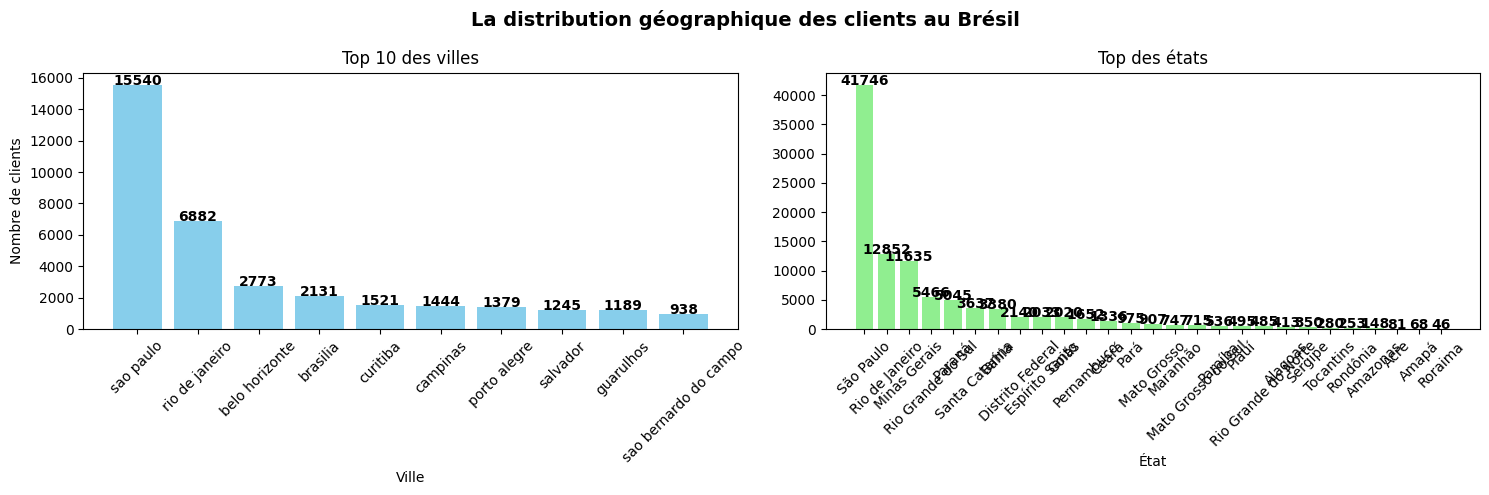

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("La distribution géographique des clients au Brésil", fontsize=14, fontweight='bold')
# Premier graphique - Top 10 des villes
top_villes = Clients['customer_city'].value_counts().head(10)
bars1 = ax1.bar(top_villes.index, top_villes.values, color='skyblue')
ax1.set_title('Top 10 des villes')
ax1.set_xlabel('Ville')
ax1.set_ylabel('Nombre de clients')
ax1.tick_params(axis='x', rotation=45)

# Ajouter les nombres au-dessus des barres du premier graphique
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{int(height)}', ha='center', fontweight='bold')

# Deuxième graphique - Top 10 des états
top_etats = Clients['customer_state'].value_counts().head(27)
# Remplacer les abréviations par les noms complets
etats_noms = [etats_bresil.get(etat, etat) for etat in top_etats.index]
bars2 = ax2.bar(etats_noms, top_etats.values, color='lightgreen')
ax2.set_title('Top des états')
ax2.set_xlabel('État')
ax2.tick_params(axis='x', rotation=45)

# Ajouter les nombres au-dessus des barres du deuxième graphique
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{int(height)}', ha='center', fontweight='bold')

# Ajuster l'espace entre les graphiques
plt.tight_layout()
plt.show()

- **Alors ici on constate que, il-y-a environt 41746 client dans São Paulo et presque 46 dans Roraima et on costat aussi que tout les client sont de Brezile**

### La Table Order 

In [10]:
Order = pd.read_csv('olist_dataset.csv/olist_orders_dataset.csv')
Order.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [11]:
Order.shape

(99441, 8)

- **la Dimension de la Table Order est (99441 lignes et 8 Colonnes)**

In [12]:
display(Markdown(f"- **Le nombre de commandes dupliquées est** **{Order['order_id'].duplicated().sum()}**"))

- **Le nombre de commandes dupliquées est** **0**

In [13]:
Order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


- **Alors, puisqu'on a des valeurs nulles, on affiche pour chaque colonne le nombre de valeurs nulles correspondantes.**

In [14]:
# Afficher le nombre de valeurs uniques pour chaque colonne spécifiée
display(Markdown(f"- **order_approved_at**\n\nLe nombre des valeur null dans cette colonne est : **{Order['order_approved_at'].isna().sum()}**"))

display(Markdown(f"- **order_delivered_carrier_date**\n\nLe nombre des valeur null dans cette colonne est : **{Order['order_delivered_carrier_date'].isna().sum()}**\n"))

display(Markdown(f"- **order_delivered_customer_date**\n\nLe nombre des valeur null dans cette colonne est : **{Order['order_delivered_customer_date'].isna().sum()}**"))


- **order_approved_at**

Le nombre des valeur null dans cette colonne est : **160**

- **order_delivered_carrier_date**

Le nombre des valeur null dans cette colonne est : **1783**


- **order_delivered_customer_date**

Le nombre des valeur null dans cette colonne est : **2965**

In [15]:
display(Markdown(f'- **Les Different Type de Order Status est :{Order['order_status'].unique()}**'))

- **Les Different Type de Order Status est :['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']**

- **created (Créée):** La commande a été enregistrée dans le système mais n'a pas encore été traitée.
- **approved (Approuvée):** Le paiement a été validé et la commande est confirmée.
- **invoiced (Facturée):** Une facture a été générée pour la commande.
- **processing (En cours de traitement):** La commande est en cours de préparation par le vendeur ou l’entrepôt.
- **shipped (Expédiée):** La commande a quitté l’entrepôt et est en route vers le client.
- **delivered (Livrée):** Le client a reçu son colis avec succès.
- **canceled (Annulée):** La commande a été annulée avant la livraison.
- **unavailable (Indisponible):** Le produit commandé est en rupture de stock ou ne peut pas être livré.

In [16]:
Order['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

- **96478 est livree donc La grande majorité des commandes sont livrées, ce qui est un bon signe pour la gestion des expéditions , et voila la repartition de ces commande livre.**

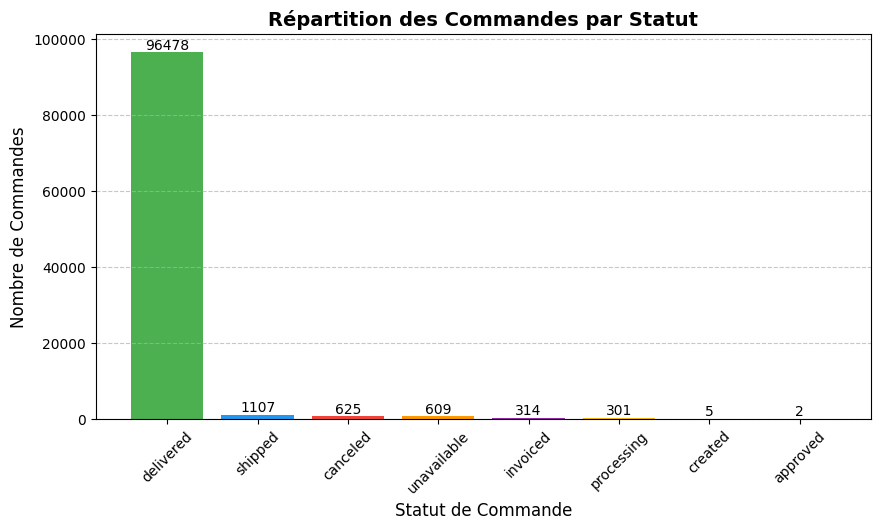

In [17]:
counts = Order["order_status"].value_counts()
statuses =counts.index

# Création du graphique en barres
plt.figure(figsize=(10, 5))
colors = ['#4CAF50', '#2196F3', '#F44336', '#FF9800', '#9C27B0', '#FFC107', '#607D8B', '#795548']
bars = plt.bar(statuses, counts, color=colors)

# Ajouter les valeurs sur les barres
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             str(bar.get_height()), ha='center', va='bottom', fontsize=10)

# Personnalisation du graphique
plt.title("Répartition des Commandes par Statut", fontsize=14, fontweight='bold')
plt.xlabel("Statut de Commande", fontsize=12)
plt.ylabel("Nombre de Commandes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


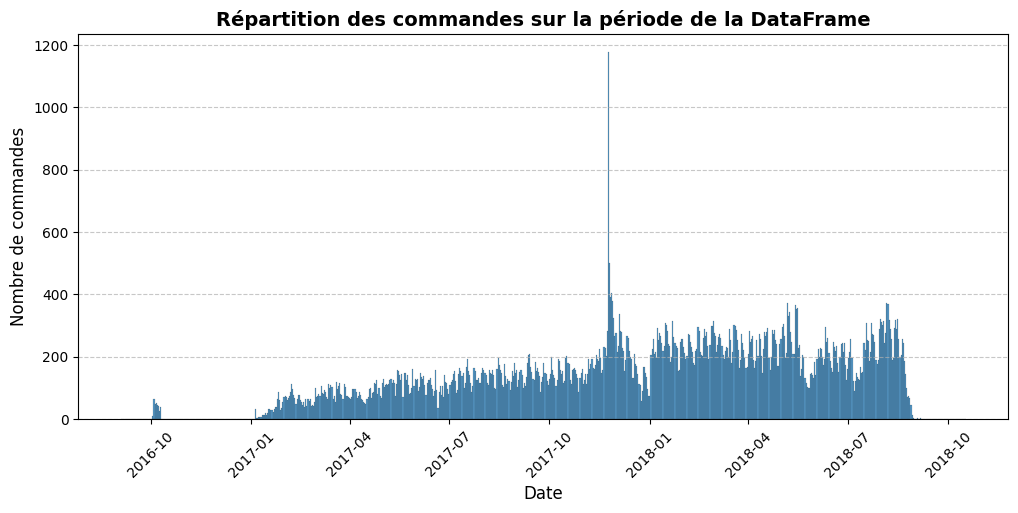

In [18]:
# Vérifier que la colonne est bien en format datetime
Order['order_purchase_timestamp'] = pd.to_datetime(Order['order_purchase_timestamp'])

# Conversion des timestamps en dates (sans heure)
Order['order_date'] = Order['order_purchase_timestamp'].dt.date

# Création du graphique
plt.figure(figsize=(12, 5))  # Ajustement de la taille du graphique
sns.histplot(Order['order_date'].sort_values(), bins=30, kde=False, discrete=True)

# Personnalisation
plt.xticks(rotation=45)  # Rotation pour améliorer la lisibilité
plt.title('Répartition des commandes sur la période de la DataFrame', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Nombre de commandes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage du graphique
plt.show()


- **Alors de ce graphe on deduit que:**

- **Au début de la période (fin 2016), le nombre de commandes est très faible, ce qui pourrait indiquer un démarrage ou une période de faible activité.**


- **À partir de début 2017, le nombre de commandes commence à augmenter de manière régulière. Le graphique montre une augmentation générale des commandes avec des pics significatifs à certaines périodes, suggérant des événements ou des campagnes spécifiques qui ont stimulé les ventes.**

In [19]:

def heure_la_plus_frequente(df, colonne_temps):
    
    if colonne_temps not in df.columns:
        raise KeyError(f"La colonne '{colonne_temps}' n'existe pas dans le DataFrame.")

    # Convertir la colonne en datetime si ce n'est pas déjà fait
    df[colonne_temps] = pd.to_datetime(df[colonne_temps], errors='coerce')

    # Vérifier s'il y a des valeurs NaT après conversion
    if df[colonne_temps].isna().sum() > 0:
        raise ValueError("Certaines valeurs n'ont pas pu être converties en datetime.")

    # Extraire l'heure et les minutes
    df['heure_minute'] = df[colonne_temps].dt.strftime('%H')

    # Trouver l'heure la plus fréquente et son nombre d'occurrences
    frequence = df['heure_minute'].value_counts()
    heure_frequente = frequence.idxmax()  # Heure la plus fréquente
    nombre_occurrences = frequence.max()  # Nombre de fois qu'elle apparaît

    return heure_frequente, nombre_occurrences

heure_frequente, nombre_occurrences = heure_la_plus_frequente(Order, "order_purchase_timestamp")
print(f"L'heure la plus fréquente est : {heure_frequente}, répétée {nombre_occurrences} fois.")


L'heure la plus fréquente est : 16, répétée 6675 fois.


- **Alors, on trouve l'heure qui se répète le plus souvent dans la colonne order_purchase_timestamp afin d'avoir une idée des moments où les Brésiliens préfèrent acheter. Cela peut nous aider à optimiser le moment du lancement des publicités et ainsi réduire les coûts publicitaires.**

- **Cette heure est 16 de matain avec nombre de repetetion est 6675 fois Alors le pic des Commande Commence Apartire de 11 du matin jusqu'au 21 du soire**

Statistiques sur la durée de livraison :
count    96424.000000
mean        11.990127
std          9.523139
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        208.000000
Name: duree_livraison_jours, dtype: float64


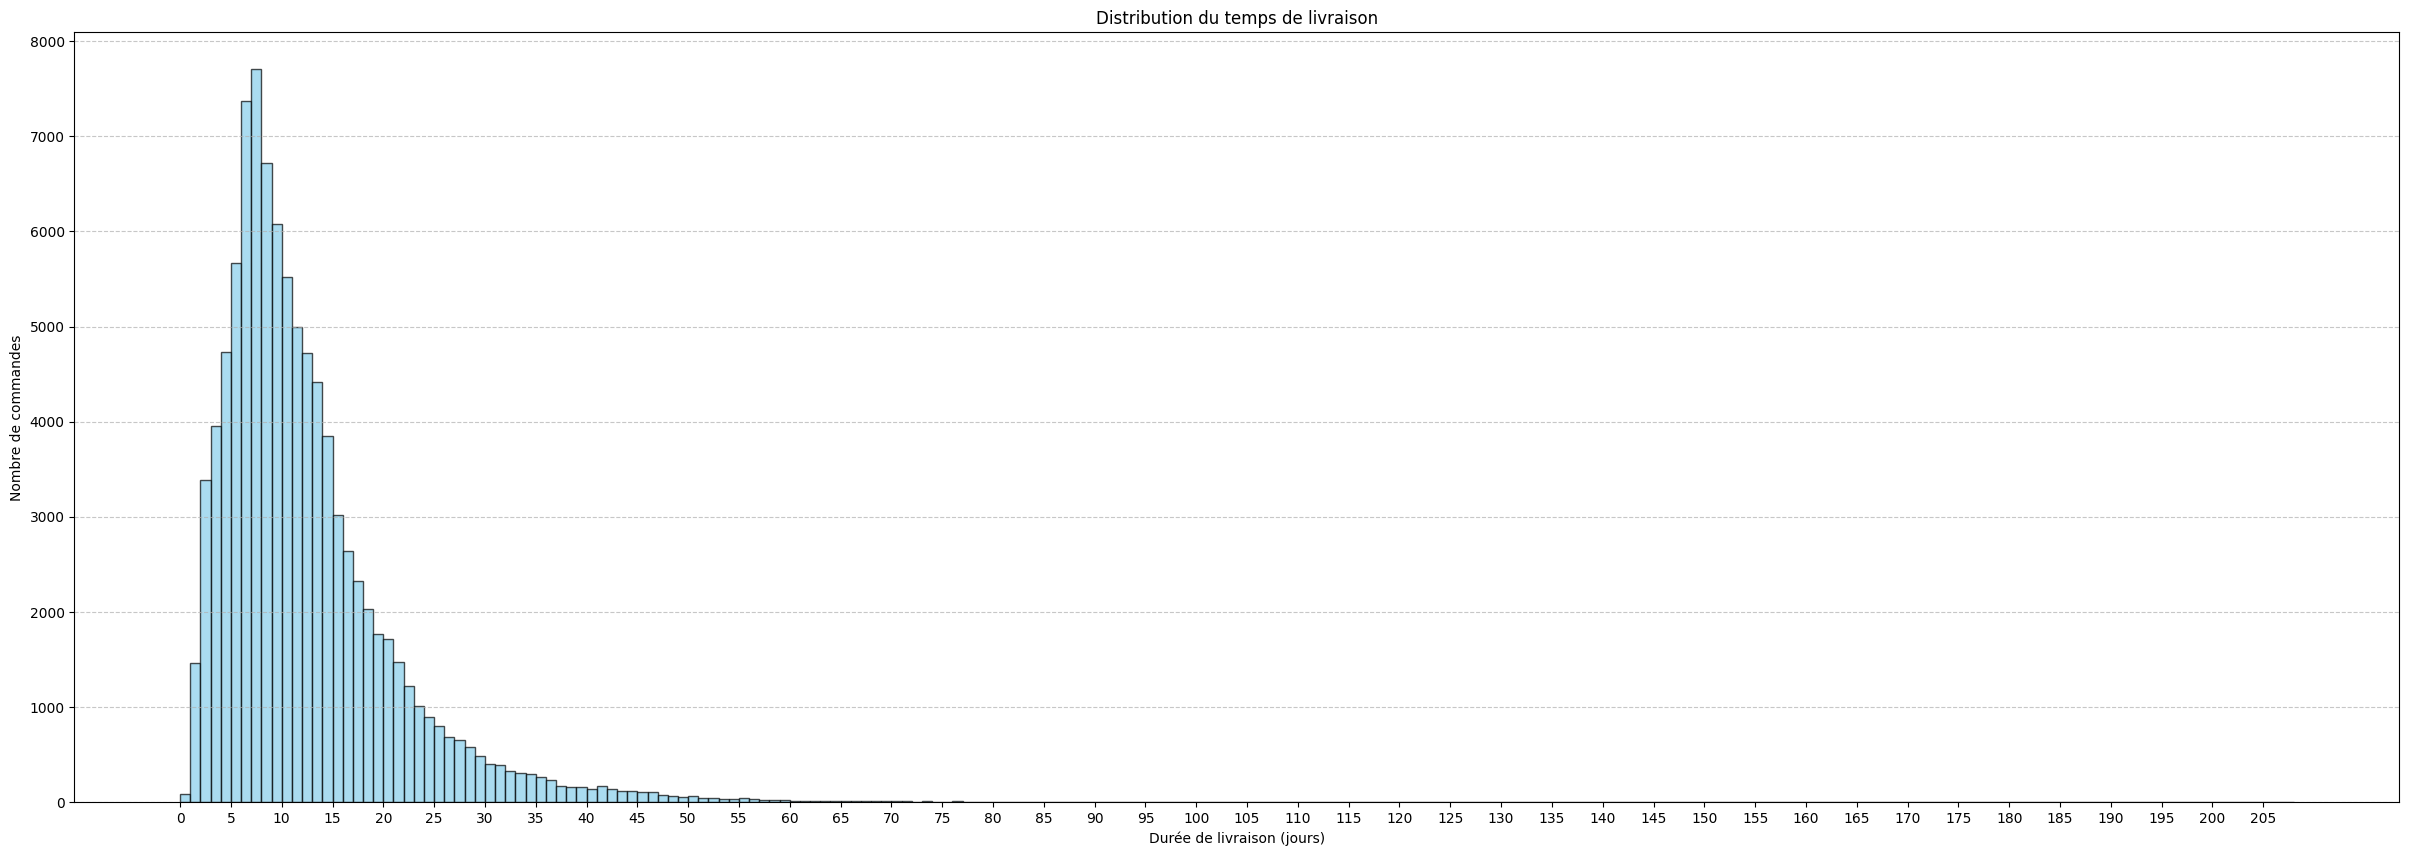

  order_approved_at order_delivered_customer_date  duree_livraison_jours
0        2017-10-02                    2017-10-10                    8.0
1        2018-07-26                    2018-08-07                   12.0
2        2018-08-08                    2018-08-17                    9.0
3        2017-11-18                    2017-12-02                   14.0
4        2018-02-13                    2018-02-16                    3.0


In [20]:
def analyser_duree_livraison(df, date_paiement, date_livraison):
    
    # Vérifier si les colonnes existent
    if date_paiement not in df.columns or date_livraison not in df.columns:
        raise KeyError("Une ou plusieurs colonnes spécifiées n'existent pas dans le DataFrame.")

    # Convertir les colonnes en datetime et extraire uniquement la date
    df[date_paiement] = pd.to_datetime(df[date_paiement], errors='coerce').dt.date
    df[date_livraison] = pd.to_datetime(df[date_livraison], errors='coerce').dt.date

    # Calculer la durée en jours
    df["duree_livraison_jours"] = (pd.to_datetime(df[date_livraison]) - pd.to_datetime(df[date_paiement])).dt.days

    # Filtrer les valeurs négatives ou NaN (livraisons incohérentes)
    df = df[df["duree_livraison_jours"] >= 0].dropna(subset=["duree_livraison_jours"])

    # Afficher des statistiques
    print("Statistiques sur la durée de livraison :")
    print(df["duree_livraison_jours"].describe())

    # Tracer un histogramme des durées de livraison
    plt.figure(figsize=(30, 10))
    plt.hist(df["duree_livraison_jours"], bins=np.arange(0, df["duree_livraison_jours"].max() + 1, 1), 
             color='skyblue', edgecolor='black', alpha=0.7)

    # Ajuster les ticks de l'axe X tous les 5 jours (modifiable)
    plt.xticks(np.arange(0, df["duree_livraison_jours"].max() + 1, 5))

    # Ajouter les labels et le titre
    plt.xlabel("Durée de livraison (jours)")
    plt.ylabel("Nombre de commandes")
    plt.title("Distribution du temps de livraison")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Afficher le graphique
    plt.show()

    # Retourner le DataFrame avec la durée de livraison
    return df[[date_paiement, date_livraison, "duree_livraison_jours"]]

# Exemple d'utilisation
resultat = analyser_duree_livraison(Order, "order_approved_at", "order_delivered_customer_date")
print(resultat.head())


- **Alors, d’après les statistiques de livraison, on constate que 75 % des commandes sont livrées en moins de 15 jours. Les retards (>14 jours) concernent environ 25 % des commandes. De plus, 50 % des commandes sont livrées en moins de 10 jours et 25 % en moins de 6 jours. Cependant, ces délais restent relativement longs. Il serait donc nécessaire d’améliorer la logistique de l’entreprise pour optimiser les délais de livraison.**

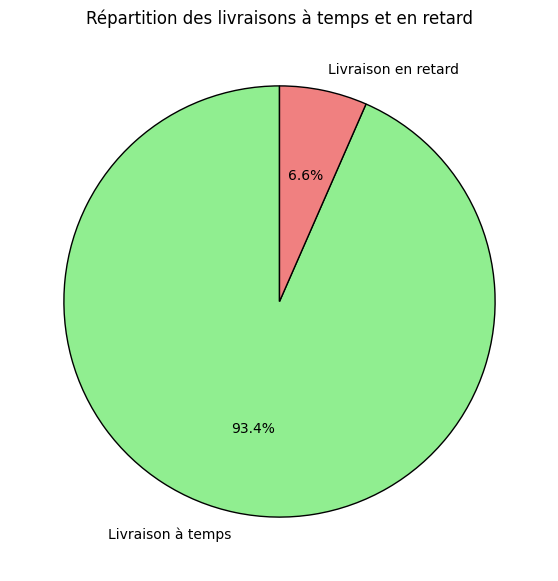

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def analyser_retards_livraison(df, date_livraison, date_estimee):
    
    # Vérifier si les colonnes existent
    if date_livraison not in df.columns or date_estimee not in df.columns:
        raise KeyError("Une ou plusieurs colonnes spécifiées n'existent pas dans le DataFrame.")

    # Convertir les colonnes en datetime et garder uniquement la date
    df[date_livraison] = pd.to_datetime(df[date_livraison], errors='coerce').dt.date
    df[date_estimee] = pd.to_datetime(df[date_estimee], errors='coerce').dt.date

    # Identifier les commandes livrées en retard
    df["en_retard"] = df[date_livraison] > df[date_estimee]

    # Calculer les pourcentages
    total_commandes = len(df)
    commandes_retard = df["en_retard"].sum()
    pourcentage_retard = (commandes_retard / total_commandes) * 100
    pourcentage_a_temps = 100 - pourcentage_retard

    # Affichage du pie chart
    labels = ["Livraison à temps", "Livraison en retard"]
    sizes = [pourcentage_a_temps, pourcentage_retard]
    colors = ["lightgreen", "lightcoral"]
    
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})
    plt.title("Répartition des livraisons à temps et en retard")
    plt.show()

    return round(pourcentage_retard, 2)

# Exemple d'utilisation
pourcentage_retard = analyser_retards_livraison(Order, "order_delivered_customer_date", "order_estimated_delivery_date")


- **Alors, on constate que le système de livraison fonctionne bien, puisque 93,4 % des commandes sont livrées avant la date estimée. Cependant, il est important de travailler à l'amélioration des 6,6 % de livraisons en retard.**

In [181]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
from zoneinfo import ZoneInfo

# Définir la date de référence comme étant "maintenant" en 2019 vu que la derniere date est de 2018
date_reference = np.datetime64(datetime.now(tz=ZoneInfo("America/Sao_Paulo")) - relativedelta(years=6))

# Calculer le délai depuis le dernier achat en jours
Order['delai_dernier_achat_jours'] = (date_reference - Order['order_purchase_timestamp']).dt.days

C:\Users\huawie\AppData\Local\Temp\ipykernel_21044\3360042537.py:6: UserWarning: no explicit representation of timezones available for np.datetime64
  date_reference = np.datetime64(datetime.now(tz=ZoneInfo("America/Sao_Paulo")) - relativedelta(years=6))


### La Table Order_reviews

In [22]:
Order_reviews=pd.read_csv('olist_dataset.csv/olist_order_reviews_dataset.csv')
Order_reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [23]:
display(Markdown(f'- la dimension de la Table est : **{Order_reviews.shape}**'))

- la dimension de la Table est : **(99224, 7)**

- **la description des colonnes de la table Order_reviews**

- **📌 review_id**  
  🔹 Identifiant unique de l’évaluation laissée par le client.  
  🔹 Permet de différencier chaque avis dans la base de données.  

- **📦 order_id**  
  🔹 Identifiant de la commande associée à l’avis.  
  🔹 Permet de faire le lien entre un avis et une commande spécifique.  

- **⭐ review_score**  
  🔹 Note attribuée par le client, généralement sur une échelle de **1 à 5**.  
  🔹 Indique le niveau de satisfaction du client concernant sa commande.  
    - 1️⃣ Très insatisfait  
    - 5️⃣ Très satisfait  

- **📝 review_comment_title**  
  🔹 Titre du commentaire laissé par le client *(optionnel)*.  
  🔹 Donne un résumé ou une idée générale de l’expérience du client.  

- **💬 review_comment_message**  
  🔹 Message détaillé du client concernant son expérience avec la commande.  
  🔹 Peut contenir des commentaires sur **le produit, la livraison ou le service client**.  

- **📅 review_creation_date**  
  🔹 Date à laquelle le client a soumis son avis.  
  🔹 Permet d’analyser l’évolution des avis dans le temps.  

- **⏳ review_answer_timestamp**  
  🔹 Date et heure à laquelle l’entreprise a répondu à l’avis du client *(si une réponse a été fournie)*.  
  🔹 Permet d’évaluer la **réactivité du service client**. 

In [24]:
display(Markdown(f'- le nombre des review doublant est : **{Order_reviews['review_id'].duplicated().sum()}**'))

- le nombre des review doublant est : **814**

- **Les review_id en double contiennent les mêmes messages aux mêmes heures, même s'ils ne concernent pas la même commande.**

In [25]:
display(Markdown(f'- le nombre des Order doublant le review est : **{Order_reviews['order_id'].duplicated().sum()}**'))

- le nombre des Order doublant le review est : **551**



- **Les order_id en double peuvent indiquer l'envoi de deux commentaires différents pour une même commande.**

In [26]:
Order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

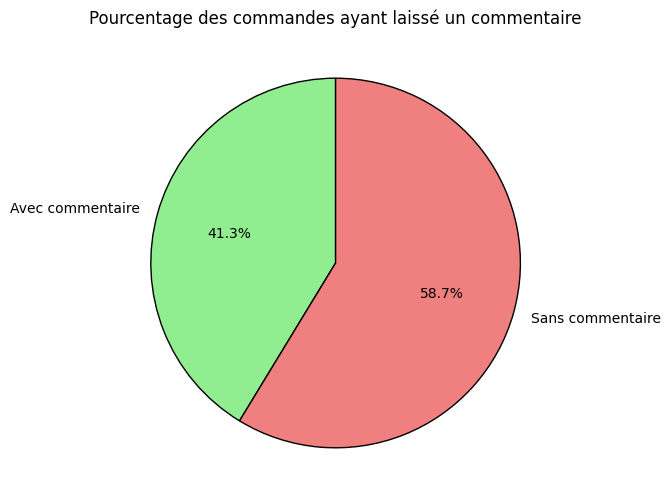

In [27]:
def analyser_pourcentage_commentaires(df, colonne_commentaire):
     # Vérifier si la colonne existe
    if colonne_commentaire not in df.columns:
        raise KeyError(f"La colonne '{colonne_commentaire}' n'existe pas dans le DataFrame.")
    
    # Compter les commandes avec et sans commentaire
    total_commandes = len(df)
    commandes_avec_commentaire = df[colonne_commentaire].notna().sum()
    commandes_sans_commentaire = total_commandes - commandes_avec_commentaire
    
    # Calculer les pourcentages
    pourcentage_avec = (commandes_avec_commentaire / total_commandes) * 100
    pourcentage_sans = (commandes_sans_commentaire / total_commandes) * 100
    
    # Affichage du graphique
    labels = ["Avec commentaire", "Sans commentaire"]
    tailles = [pourcentage_avec, pourcentage_sans]
    couleurs = ['lightgreen', 'lightcoral']

    plt.figure(figsize=(6, 6))
    plt.pie(tailles, labels=labels, autopct='%1.1f%%', colors=couleurs, startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title("Pourcentage des commandes ayant laissé un commentaire")
    plt.show()

    return {"Avec commentaire": pourcentage_avec, "Sans commentaire": pourcentage_sans}

# Exemple d'utilisation
resultat = analyser_pourcentage_commentaires(Order_reviews, "review_comment_message")


- **Alors de ces resultat on constat que envirant 60% des order sans Commentaire**

In [28]:
Order_reviews['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

- **Alors on constate que 57328 des commentaire avec un score de 5, Mais on oblie pas qu'on a une 60% des commentaires sont null**

### La Table Order_Payments

In [29]:
Order_Payments= pd.read_csv('olist_dataset.csv/olist_order_payments_dataset.csv')
Order_Payments.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [30]:
display(Markdown(f'- la dimension de la Table est : **{Order_Payments.shape}**'))

- la dimension de la Table est : **(103886, 5)**

- **<span style="color:#3498db;">Description des Colonnes de Paiement</span>**

- **order_id**  
  🔹 Identifiant unique de la commande.  

- **payment_sequential**  
  🔹 Numéro séquentiel du paiement pour une commande donnée.  
  🔹 Certaines commandes peuvent avoir plusieurs paiements.  

- **payment_type**  
  🔹 Méthode de paiement utilisée (**Carte de crédit, Boleto, Bon d'achat, Carte de débit**).  

- **payment_installments**  
  🔹 Nombre de mensualités pour le paiement.  

- **payment_value**  
  🔹 Montant payé en **Réaux brésiliens (BRL)**.

In [31]:
Order_Payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [32]:
Order_Payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

- **Alors, on voit qu'il n'y a aucune valeur nulle dans notre table Order_Payment, ce qui signifie que les systèmes de paiement fonctionnent correctement.**

In [33]:
display(Markdown(f'- le nombre des order doublant est: **{Order_Payments['order_id'].duplicated().sum()}**'))

- le nombre des order doublant est: **4446**

In [34]:
Order_Payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

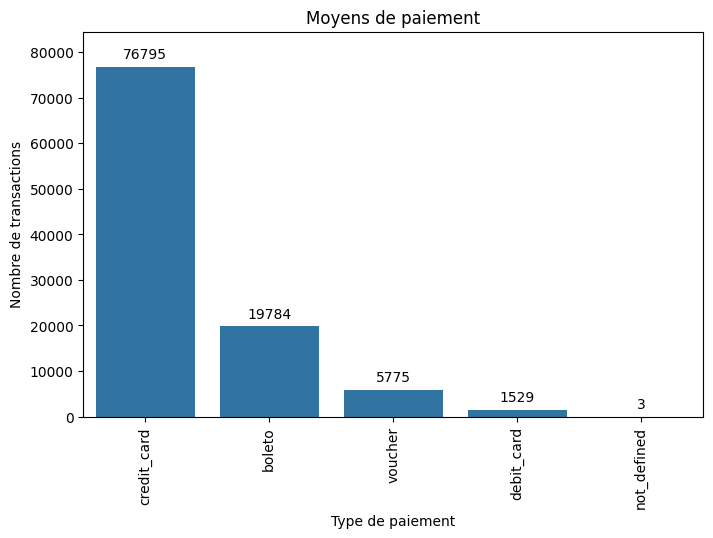

In [35]:
# Comptage des différents types de moyens de paiement
payment_counts = Order_Payments['payment_type'].value_counts()

# Création de la figure pour la représentation graphique
plt.figure(figsize=(8, 5))

# Création du graphique à barres pour les moyens de paiement
ax = sns.barplot(x=payment_counts.index, y=payment_counts.values)

# Ajout des étiquettes de valeur sur les barres
ax.bar_label(ax.containers[0], padding=4)  

plt.title('Moyens de paiement')   
plt.ylabel('Nombre de transactions')  
plt.xlabel('Type de paiement')  
plt.xticks(rotation=90)  
ax.margins(y=0.1)  

plt.show()

- **On constate que la méthode de paiement préférée est la carte de crédit ("Credit card")."**

In [36]:
Order_Payments['payment_installments'].value_counts()

payment_installments
1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
22        1
23        1
Name: count, dtype: int64

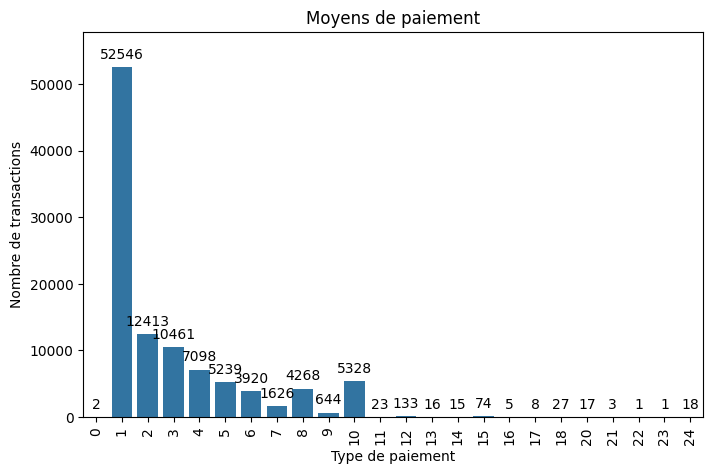

In [37]:
# Comptage des différents types de moyens de paiement
payment_counts = Order_Payments['payment_installments'].value_counts()

# Création de la figure pour la représentation graphique
plt.figure(figsize=(8, 5))

# Création du graphique à barres pour les moyens de paiement
ax = sns.barplot(x=payment_counts.index, y=payment_counts.values)

# Ajout des étiquettes de valeur sur les barres
ax.bar_label(ax.containers[0], padding=4)  

plt.title('Moyens de paiement')   
plt.ylabel('Nombre de transactions')  
plt.xlabel('Type de paiement')  
plt.xticks(rotation=90)  
ax.margins(y=0.1)  

plt.show()

- **Alors, on constate que 50,6 % des paiements sont effectués en une seule fois et que 12 % des paiements sont effectués en deux fois. Ci-dessous, le diagramme détaillé qui illustre la répartition des paiements en pourcentage.**

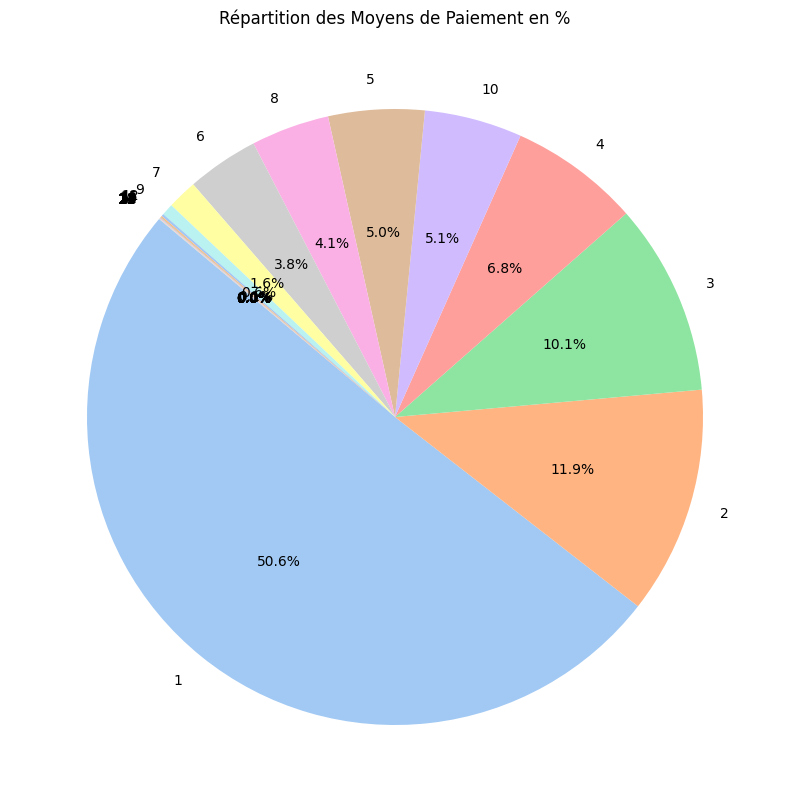

In [38]:
import matplotlib.pyplot as plt

# Comptage des différents types de moyens de paiement
payment_counts = Order_Payments['payment_installments'].value_counts()

# Création du pie chart
plt.figure(figsize=(10, 10))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

plt.title('Répartition des Moyens de Paiement en %')
plt.show()


### La Table Order_Items

In [39]:
Order_Items = pd.read_csv('olist_dataset.csv/olist_order_items_dataset.csv')
Order_Items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [40]:
display(Markdown(f'- la dimension de la table est : **{Order_Items.shape}**'))

- la dimension de la table est : **(112650, 7)**

- **<span style="color:#3498db;">Description des Colonnes de Paiement</span>**
- **order_id :** Identifiant unique de la commande. Il relie cet article à la commande correspondante dans la table orders.
- **order_item_id :** Numéro de l'article dans la commande (ex. : 1 pour le premier article, 2 pour le deuxième, etc.). Il permet de différencier plusieurs articles dans une même commande.
- **product_id :** Identifiant unique du produit commandé, qui fait référence à la table products.
- **seller_id :** Identifiant du vendeur qui vend cet article. Une même commande peut contenir des articles de plusieurs vendeurs différents.
- **shipping_limit_date :** Date limite à laquelle le vendeur doit expédier l'article. Elle est définie en fonction des conditions de livraison.
- **price :** Prix de l'article commandé.
- **freight_value :** Frais de livraison associés à cet article.

In [41]:
display(Markdown(f'- le nombre des commandes repeter est : **{Order_Items['order_id'].duplicated().sum()}**'))

- le nombre des commandes repeter est : **13984**

In [42]:
Order_Items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [43]:
Order_Items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

- **Le nombres des valeur Null dans cette Dataframe est 0 dans tout les colonnes**

In [44]:
display(Markdown(f'- le nombre des produit est : **{Order_Items['product_id'].nunique()}**'))
display(Markdown(f'- le nombre des commandes est : **{Order_Items['order_id'].nunique()}**'))

- le nombre des produit est : **32951**

- le nombre des commandes est : **98666**

In [45]:
display(Markdown(f"- totale des produits vendus est de **{Order_Items['price'].sum():.2f}**"))

- totale des produits vendus est de **13591643.70**

In [46]:
display(Markdown(f"- totale des frait est de **{Order_Items['freight_value'].sum():.2f}**"))

- totale des frait est de **2251909.54**

In [47]:
Order_Items['order_item_id'].value_counts()

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64

### La Table Products

In [48]:
Products = pd.read_csv('olist_dataset.csv/olist_products_dataset.csv')
Products.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [49]:
display(Markdown(f'- la dimension de la Table est : **{Products.shape}**'))

- la dimension de la Table est : **(32951, 9)**

- **<span style="color:#3498db;">Description des Colonnes des Produits</span>**
- **product_id :** Identifiant unique du produit.
- **product_category_name :** Catégorie du produit (ex. : *electronics, furniture, toys*).
- **product_name_length :** Longueur du nom du produit (en nombre de caractères).
- **product_description_length :** Longueur de la description du produit (en nombre de caractères).
- **product_photos_qty :** Nombre de photos associées au produit.
- **product_weight_g :** Poids du produit (en grammes).
- **product_length_cm :** Longueur du produit (en cm).
- **product_height_cm :** Hauteur du produit (en cm).
- **product_width_cm :** Largeur du produit (en cm).

In [50]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [51]:
missing_values = Products.isna().sum().to_string()
display(Markdown(f"- **Nombre de valeurs manquantes par colonne :**\n\n```\n{missing_values}\n```"))

- **Nombre de valeurs manquantes par colonne :**

```
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
```

In [52]:
display(Markdown(f'- le Nombre des produit dublique dans la Table Produits est : **{Products['product_id'].duplicated().sum()}**'))

- le Nombre des produit dublique dans la Table Produits est : **0**

In [53]:
display(Markdown(f'- le nombre des categorie existe dans le site est : **{Products['product_category_name'].nunique()}**'))

- le nombre des categorie existe dans le site est : **73**

C:\Users\huawie\AppData\Local\Temp\ipykernel_21044\364433146.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_photo_counts.index, y=category_photo_counts.values, palette="viridis")


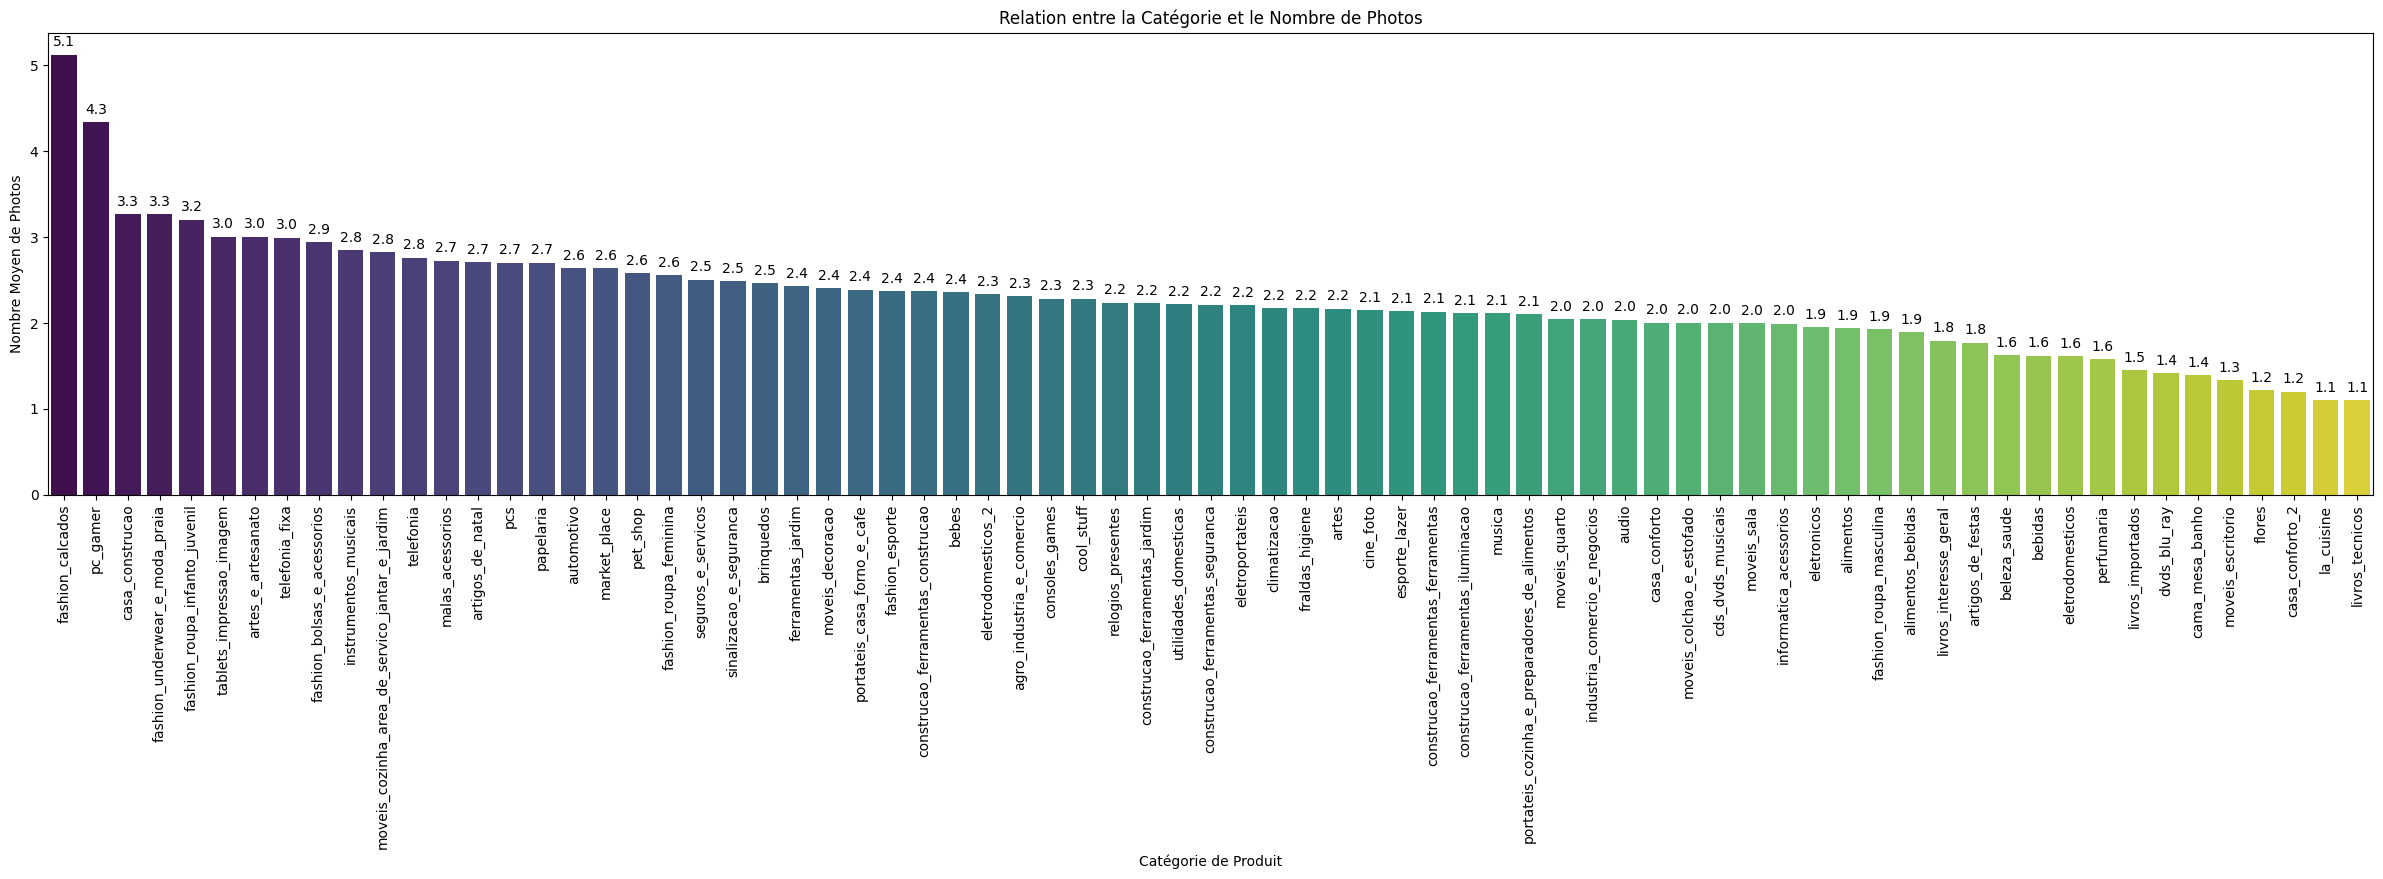

In [54]:
def plot_category_vs_photos(df):
    plt.figure(figsize=(30, 6))
    
    # Calcul du nombre moyen de photos par catégorie
    category_photo_counts = df.groupby("product_category_name")["product_photos_qty"].mean().sort_values(ascending=False)

    # Création du graphique
    sns.barplot(x=category_photo_counts.index, y=category_photo_counts.values, palette="viridis")

    # Rotation des étiquettes pour une meilleure lisibilité
    plt.xticks(rotation=90)
    
    # Ajout des étiquettes et du titre
    plt.xlabel("Catégorie de Produit")
    plt.ylabel("Nombre Moyen de Photos")
    plt.title("Relation entre la Catégorie et le Nombre de Photos")
    
    # Ajout des valeurs sur les barres
    for index, value in enumerate(category_photo_counts.values):
        plt.text(index, value + 0.1, f"{value:.1f}", ha="center", fontsize=10)

    plt.show()

plot_category_vs_photos(Products)


- **Ce schéma illustre la relation entre le nombre de photos utilisées pour chaque produit. On constate que la catégorie fashion_calcados nécessite en moyenne 5 photos, ce qui en fait la catégorie demandant le plus de photos.**

C:\Users\huawie\AppData\Local\Temp\ipykernel_21044\1002450349.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_volume.index, y=category_volume.values, palette="coolwarm")


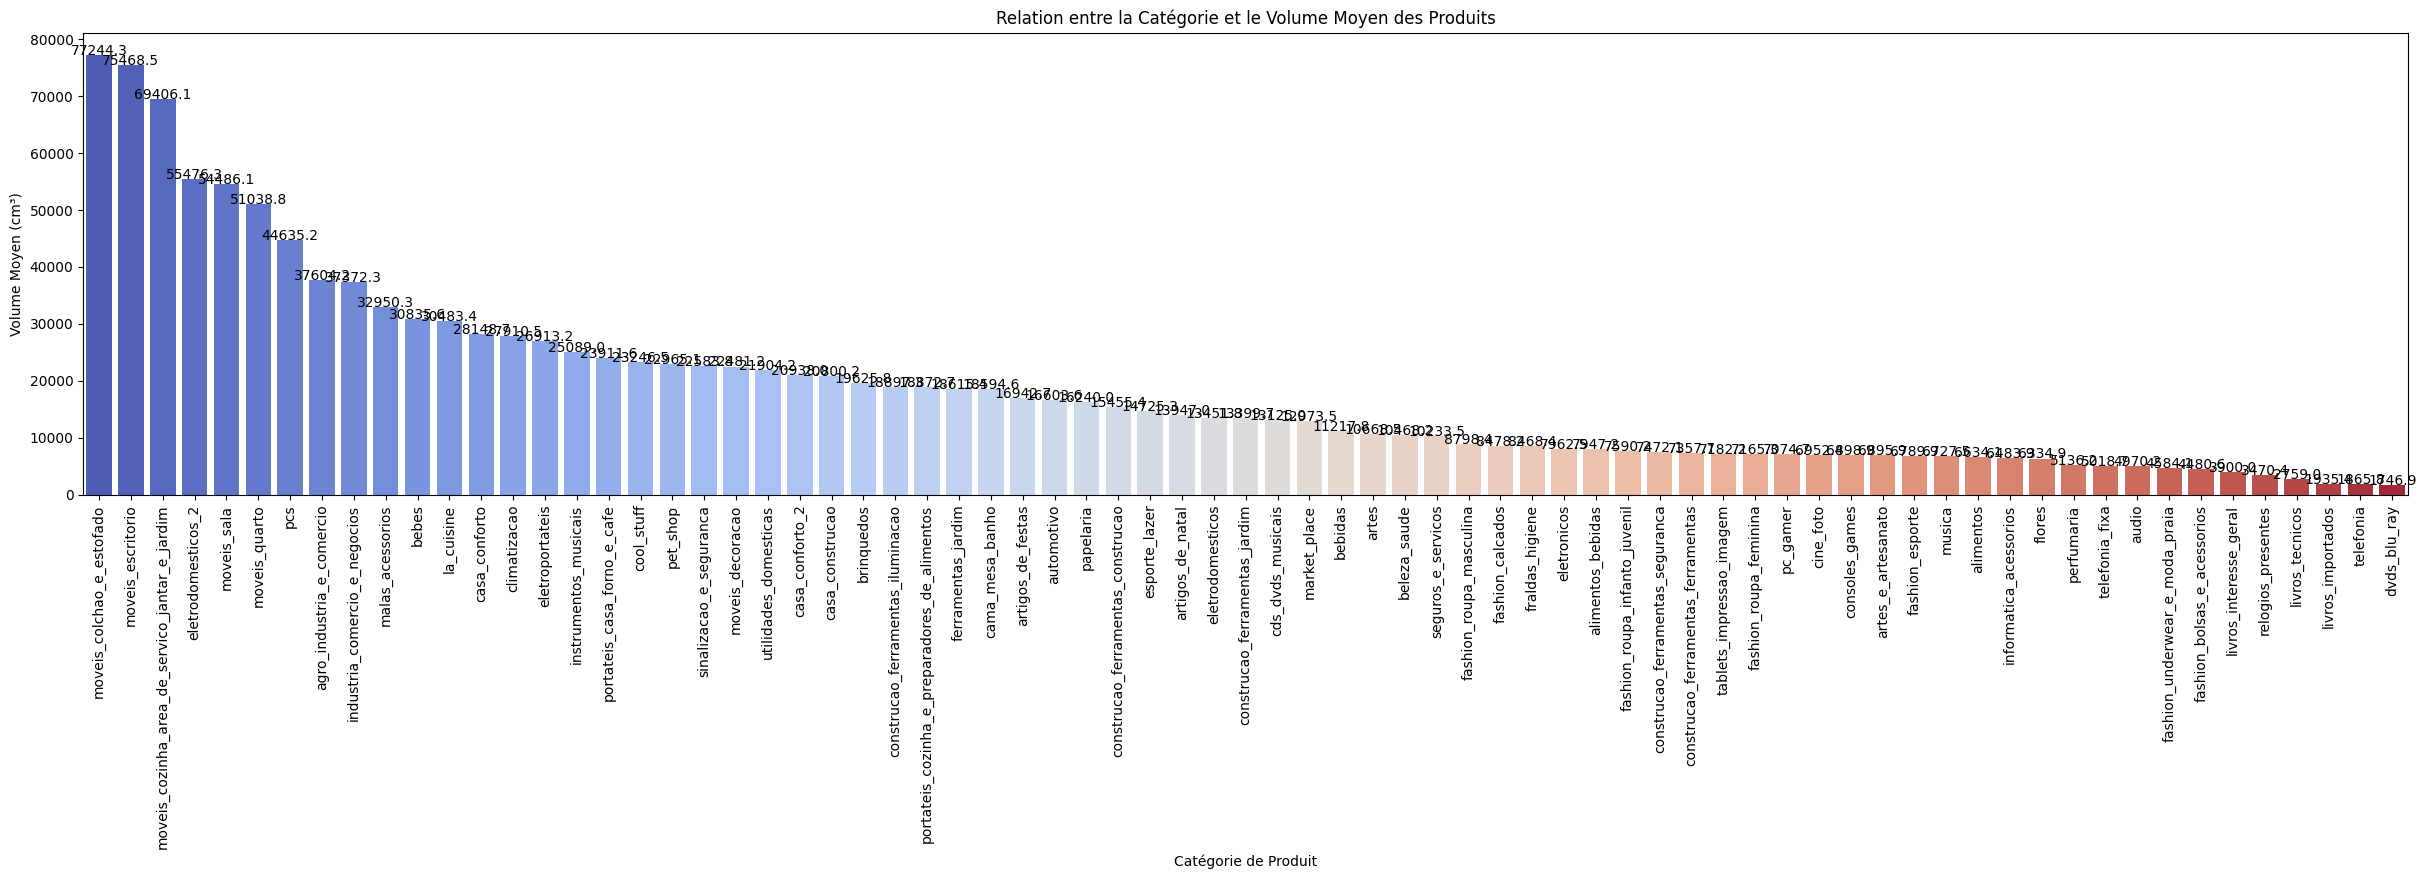

In [55]:
def plot_category_vs_volume(df):
    # Calcul du volume des produits
    df["product_volume_cm3"] = df["product_length_cm"] * df["product_height_cm"] * df["product_width_cm"]
    
    # Calcul du volume moyen par catégorie
    category_volume = df.groupby("product_category_name")["product_volume_cm3"].mean().sort_values(ascending=False)

    # Création de la figure
    plt.figure(figsize=(30, 6))
    sns.barplot(x=category_volume.index, y=category_volume.values, palette="coolwarm")

    # Rotation des étiquettes pour une meilleure lisibilité
    plt.xticks(rotation=90)

    # Ajout des étiquettes et du titre
    plt.xlabel("Catégorie de Produit")
    plt.ylabel("Volume Moyen (cm³)")
    plt.title("Relation entre la Catégorie et le Volume Moyen des Produits")

    # Ajout des valeurs sur les barres
    for index, value in enumerate(category_volume.values):
        plt.text(index, value + 50, f"{value:.1f}", ha="center", fontsize=10)

    plt.show()

# Appel de la fonction avec le DataFrame
plot_category_vs_volume(Products)


- **Ce schéma illustre la relation entre le volume pour chaque produit et sa category. On constate que la catégorie moveis_colchao_e_estofado  nécessite en moyenne 80000 cm3 , ce qui en fait la catégorie demandant le plus de volume en stock.**

### La Table Product_Category

In [56]:
Product_Category = pd.read_csv('olist_dataset.csv/product_category_name_translation.csv')
Product_Category.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [57]:
display(Markdown(f'- la dimension de cette Table est  : **{Product_Category.shape}**'))

- la dimension de cette Table est  : **(71, 2)**

**Description des Colonnes de Catégories de Produits**
- **<span style="color:#3498db;">product_category_name</span>**  : Nom de la catégorie du produit en **portugais**.
  - Exemples : `perfumaria`, `esporte_lazer`, `utilidades_domesticas`
  
- **<span style="color:#e67e22;">product_category_name_english</span>**  : Traduction en **anglais** du nom de la catégorie.
  - Exemples : `perfumery`, `sports_leisure`, `household_utilities`
  
✅ **Utilité :** Permet d’avoir une version compréhensible pour un public international, sans nécessiter de traduction manuelle.

In [58]:
Product_Category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

- **Il n'y a aucune valeur nulle dans cette table, ce qui signifie que nous avons la traduction de toutes les catégories.**

In [59]:
display(Markdown(f'- la Nombre des doublant est  : **{Product_Category.duplicated().sum()}**'))

- la Nombre des doublant est  : **0**

### La Table Geolocation

In [60]:
Geolocalisation = pd.read_csv('olist_dataset.csv/olist_geolocation_dataset.csv')
Geolocalisation.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [61]:
display(Markdown(f'- la dimension de cette Table est  : **{Geolocalisation.shape}**'))

- la dimension de cette Table est  : **(1000163, 5)**

**Description des Colonnes de Géolocalisation**
- **<span style="color:#3498db;">geolocation_zip_code_prefix</span>** :  
  - Code postal tronqué (uniquement les premiers chiffres) utilisé pour l'identification de la localisation.
  - Exemple : `01000`, `22000`, `33000`

- **<span style="color:#e74c3c;">geolocation_lat</span>**  :  
  - Latitude de l'emplacement, utilisée pour la cartographie et l'analyse géospatiale.
  - Exemple : `-23.5505`

- **<span style="color:#f39c12;">geolocation_lng</span>** :  
  - Longitude de l'emplacement, associée à la latitude pour déterminer un point précis sur la carte.
  - Exemple : `-46.6333`

- **<span style="color:#2ecc71;">geolocation_city</span>**  :  
  - Nom de la ville correspondant au code postal.
  - Exemple : `São Paulo`, `Rio de Janeiro`, `Belo Horizonte`

- **<span style="color:#9b59b6;">geolocation_state</span>** 🇧🇷 :  
  - Code de l'État brésilien sous forme de sigle (deux lettres).
  - Exemple : `SP` (São Paulo), `RJ` (Rio de Janeiro), `MG` (Minas Gerais)

✅ **Utilité :**  
Ces données permettent d'analyser la répartition géographique des commandes, de tracer des cartes et de comprendre la distribution des clients et des vendeurs.

In [62]:
Geolocalisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [63]:
Geolocalisation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

- **Pas de Valeur Null Dans cette Table**

In [64]:
duplicate_rows = Geolocalisation.duplicated().sum()
display(Markdown(f'- le nombre des valeur null est : **{duplicate_rows}**'))

- le nombre des valeur null est : **261831**

In [65]:
# Suppression des doublons
Geolocalisation = Geolocalisation.drop_duplicates()

# Vérification de la taille du dataset après suppression
cleaned_data_size = Geolocalisation.shape
display(Markdown(f'- le  noveau dimension de la table est : **{cleaned_data_size}**'))

- le  noveau dimension de la table est : **(738332, 5)**

In [66]:
# Valeurs uniques des colonnes ville et état
unique_cities = Geolocalisation['geolocation_city'].unique()
unique_states = Geolocalisation['geolocation_state'].unique()

display(Markdown(f"- **les state de brazile mentionner est :**\n\n```\n{unique_states}\n```"))
display(Markdown(f"- **une dix ville mentionner  :**\n\n```\n{unique_cities[:10]}\n```"))

- **les state de brazile mentionner est :**

```
['SP' 'RN' 'AC' 'RJ' 'ES' 'MG' 'BA' 'SE' 'PE' 'AL' 'PB' 'CE' 'PI' 'MA'
 'PA' 'AP' 'AM' 'RR' 'DF' 'GO' 'RO' 'TO' 'MT' 'MS' 'RS' 'PR' 'SC']
```

- **une dix ville mentionner  :**

```
['sao paulo' 'são paulo' 'sao bernardo do campo' 'jundiaí'
 'taboão da serra' 'sãopaulo' 'sp' 'sa£o paulo' 'sao jose dos campos'
 'osasco']
```

In [67]:
# Ajouter une colonne 'Coordonnees' contenant les coordonnées (latitude, longitude) pour chaque ligne
Geolocalisation['Coordonnees'] = Geolocalisation.apply(lambda row: [row['geolocation_lat'], row['geolocation_lng']], axis=1)

# Afficher les premières lignes pour vérifier
Geolocalisation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,Coordonnees
0,1037,-23.545621,-46.639292,sao paulo,SP,"[-23.54562128115268, -46.63929204800168]"
1,1046,-23.546081,-46.644820,sao paulo,SP,"[-23.54608112703553, -46.64482029837157]"
2,1046,-23.546129,-46.642951,sao paulo,SP,"[-23.54612896641469, -46.64295148361138]"
3,1041,-23.544392,-46.639499,sao paulo,SP,"[-23.5443921648681, -46.63949930627844]"
4,1035,-23.541578,-46.641607,sao paulo,SP,"[-23.541577961711493, -46.64160722329613]"


In [68]:
# Suppression des colonnes 'geolocation_lat' et 'geolocation_lng'
Geolocalisation = Geolocalisation.drop(columns=['geolocation_lat', 'geolocation_lng'])
Geolocalisation.head()

,geolocation_zip_code_prefix,geolocation_city,geolocation_state,Coordonnees
0,1037,sao paulo,SP,"[-23.54562128115268, -46.63929204800168]"
1,1046,sao paulo,SP,"[-23.54608112703553, -46.64482029837157]"
2,1046,sao paulo,SP,"[-23.54612896641469, -46.64295148361138]"
3,1041,sao paulo,SP,"[-23.5443921648681, -46.63949930627844]"
4,1035,sao paulo,SP,"[-23.541577961711493, -46.64160722329613]"


In [69]:
'''# Initialiser la carte avec la première coordonnée et un niveau de zoom de 3
m = folium.Map(location=Geolocalisation.Coordonnees[0], zoom_start=3)

# Ajouter des cercles pour chaque coordonnée dans geolocalisation
for coord, city in tqdm(zip(Geolocalisation.Coordonnees, Geolocalisation.geolocation_city), total=len(Geolocalisation)):
    folium.Circle(location=coord, radius=10, popup=city).add_to(m)

# Afficher la carte
m'''

'# Initialiser la carte avec la première coordonnée et un niveau de zoom de 3\nm = folium.Map(location=Geolocalisation.Coordonnees[0], zoom_start=3)\n\n# Ajouter des cercles pour chaque coordonnée dans geolocalisation\nfor coord, city in tqdm(zip(Geolocalisation.Coordonnees, Geolocalisation.geolocation_city), total=len(Geolocalisation)):\n    folium.Circle(location=coord, radius=10, popup=city).add_to(m)\n\n# Afficher la carte\nm'

### La Table Seller

In [70]:
Vendeur =pd.read_csv('olist_dataset.csv/olist_sellers_dataset.csv')
Vendeur.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [71]:
display(Markdown(f'- La dimension de la Table est : **{Vendeur.shape}**'))

- La dimension de la Table est : **(3095, 4)**

- **Description des Colonnes**

- **<span style="color:#3498db;">seller_id</span>** :
  - Identifiant unique du vendeur.
  
- **<span style="color:#e74c3c;">seller_zip_code_prefix</span>** :
  - Préfixe du code postal du vendeur.

- **<span style="color:#f39c12;">seller_city</span>** :
  - Ville où est basé le vendeur.

- **<span style="color:#2ecc71;">seller_state</span>** :
  - Code de l'État (ou région) du vendeur.

✅ **Utilité :**  
Ces données permettent d'identifier l'emplacement des vendeurs, d'analyser leur distribution géographique et d'optimiser la logistique.

In [72]:
Vendeur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [73]:
Vendeur.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

- **aucune valeur null est dans la table vendeur**

In [74]:
display(Markdown(f'- Le nombre des vendeur duplicated dans la Table  est : **{Vendeur['seller_id'].duplicated().sum()}**'))

- Le nombre des vendeur duplicated dans la Table  est : **0**

In [75]:
display(Markdown(f'- Les vendeur il sos repartire dans  **{Vendeur['seller_state'].nunique()}** State et **{Vendeur['seller_city'].nunique()}** villes'))

- Les vendeur il sos repartire dans  **23** State et **611** villes

In [76]:
etats_bresil = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AM': 'Amazonas',
    'AP': 'Amapá',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MG': 'Minas Gerais',
    'MS': 'Mato Grosso do Sul',
    'MT': 'Mato Grosso',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'PR': 'Paraná',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'RS': 'Rio Grande do Sul',
    'SC': 'Santa Catarina',
    'SE': 'Sergipe',
    'SP': 'São Paulo',
    'TO': 'Tocantins'
}
Vendeur['seller_state'] = Vendeur['seller_state'].map(etats_bresil)

In [77]:
Vendeur.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,São Paulo
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,São Paulo
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,Rio de Janeiro
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,São Paulo
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,São Paulo


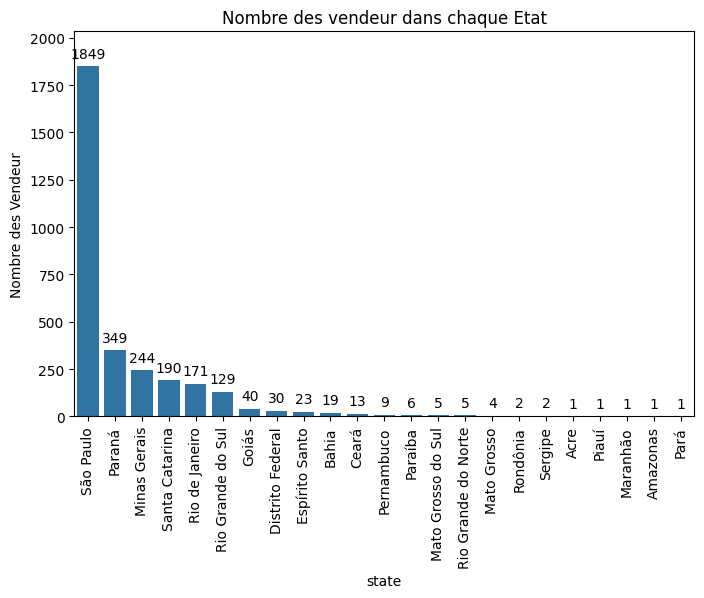

In [78]:
# Comptage des différents types de moyens de paiement
payment_counts = Vendeur['seller_state'].value_counts()

# Création de la figure pour la représentation graphique
plt.figure(figsize=(8, 5))

# Création du graphique à barres pour les moyens de paiement
ax = sns.barplot(x=payment_counts.index, y=payment_counts.values)

# Ajout des étiquettes de valeur sur les barres
ax.bar_label(ax.containers[0], padding=4)  

plt.title('Nombre des vendeur dans chaque Etat')   
plt.ylabel('Nombre des Vendeur')  
plt.xlabel('state')  
plt.xticks(rotation=90)  
ax.margins(y=0.1)  

plt.show()

--> **Remarquant que la majorité des vendeurs sont de São Paulo**

In [79]:
carte_choropleth = px.choropleth(
    vendeurs_par_etat,
    locations='etat',
    geojson=Brazil,
    featureidkey="properties.name",  # Vérifie que c'est bien la clé utilisée dans ton GeoJSON
    color='nombre_vendeurs',
    hover_name='etat',
    title='Répartition des vendeurs par état',
    color_continuous_scale="Viridis"
)

# Mettre à jour les paramètres géographiques de la carte
carte_choropleth.update_geos(fitbounds="locations", visible=False)

# Afficher la carte
carte_choropleth.show()

NameError: name 'vendeurs_par_etat' is not defined

- **Pour plus d'informations, on fusionne ces tableaux.**

### La fusionne des Tableau pour plus d'information 

- **<span style='color:red;'>Comme il y a une correspondance entre les tables, on utilise INNER JOIN pour bien les fusionner.</span>**
- **Les avantages de INNER JOIN est :🔹 Évite les valeurs inutiles
  🔹 Plus rapide car moins de données**

In [101]:
produits_achetes = pd.merge(Products, Order_Items, how='outer', on='product_id')

In [182]:
# Convertir les valeurs de la colonne geolocation_city en chaînes de caractères
Geolocalisation['geolocation_city'] = Geolocalisation['geolocation_city'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else str(x))

# Fonction de nettoyage des noms de villes
def clean_city_name(city_name):
    return re.sub(r'\W+', '', city_name).strip().lower()

# Appliquer la fonction de nettoyage aux noms de villes
Clients['customer_city_clean'] = Clients['customer_city'].apply(lambda x: clean_city_name(str(x)))
Geolocalisation['geolocation_city_clean'] = Geolocalisation['geolocation_city'].apply(lambda x: clean_city_name(str(x)))

# Effectuer les jointures
merged_data = pd.merge(Clients, Order, on='customer_id', how='inner')
merged_data = pd.merge(merged_data, Order_Payments, on='order_id', how='inner')
merged_data = pd.merge(merged_data, produits_achetes, on='order_id', how='inner')
merged_data = pd.merge(merged_data, Order_reviews, on='order_id', how='inner')
merged_data = pd.merge(merged_data, Vendeur, on='seller_id', how='inner')

# Afficher un aperçu des données jointes
merged_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_city_clean,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_date,heure_minute,duree_livraison_jours,en_retard,delai_dernier_achat_jours,payment_sequential,payment_type,payment_installments,payment_value,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,order_item_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,São Paulo,franca,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16,2017-05-23 10:47:57,2017-05-25,2017-06-05,2017-05-16,15,9.0,False,666,1,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,107136.0,1,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,8577,itaquaquecetuba,São Paulo
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,São Paulo,saobernardodocampo,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12,2018-01-15 17:14:59,2018-01-29,2018-02-06,2018-01-12,20,17.0,False,425,1,credit_card,8,335.48,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,53400.0,1,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,88303,itajai,Santa Catarina
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,São Paulo,saopaulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20,2018-06-11 14:31:00,2018-06-14,2018-06-13,2018-05-19,16,25.0,True,298,1,credit_card,7,157.73,bd07b66896d6f1494f5b86251848ced7,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,45968.0,1,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,8577,itaquaquecetuba,São Paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,São Paulo,mogidascruzes,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13,2018-03-27 23:22:42,2018-03-28,2018-04-10,2018-03-13,16,15.0,False,365,1,credit_card,1,173.30,a5647c44af977b148e0a3a4751a09e2e,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,79968.0,1,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,8577,itaquaquecetuba,São Paulo
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,São Paulo,campinas,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29,2018-07-30 15:16:00,2018-08-09,2018-08-15,2018-07-29,09,11.0,False,227,1,credit_card,8,252.25,9391a573abe00141c56e38d84d7d5b3b,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,23625.0,1,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,14940,ibitinga,São Paulo


In [183]:
merged_data.shape

(117329, 46)

In [184]:
pd.set_option("display.max_columns", 100)

In [185]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    117329 non-null  object        
 1   customer_unique_id             117329 non-null  object        
 2   customer_zip_code_prefix       117329 non-null  int64         
 3   customer_city                  117329 non-null  object        
 4   customer_state                 117329 non-null  object        
 5   customer_city_clean            117329 non-null  object        
 6   order_id                       117329 non-null  object        
 7   order_status                   117329 non-null  object        
 8   order_purchase_timestamp       117329 non-null  datetime64[ns]
 9   order_approved_at              117314 non-null  object        
 10  order_delivered_carrier_date   116094 non-null  object        
 11  

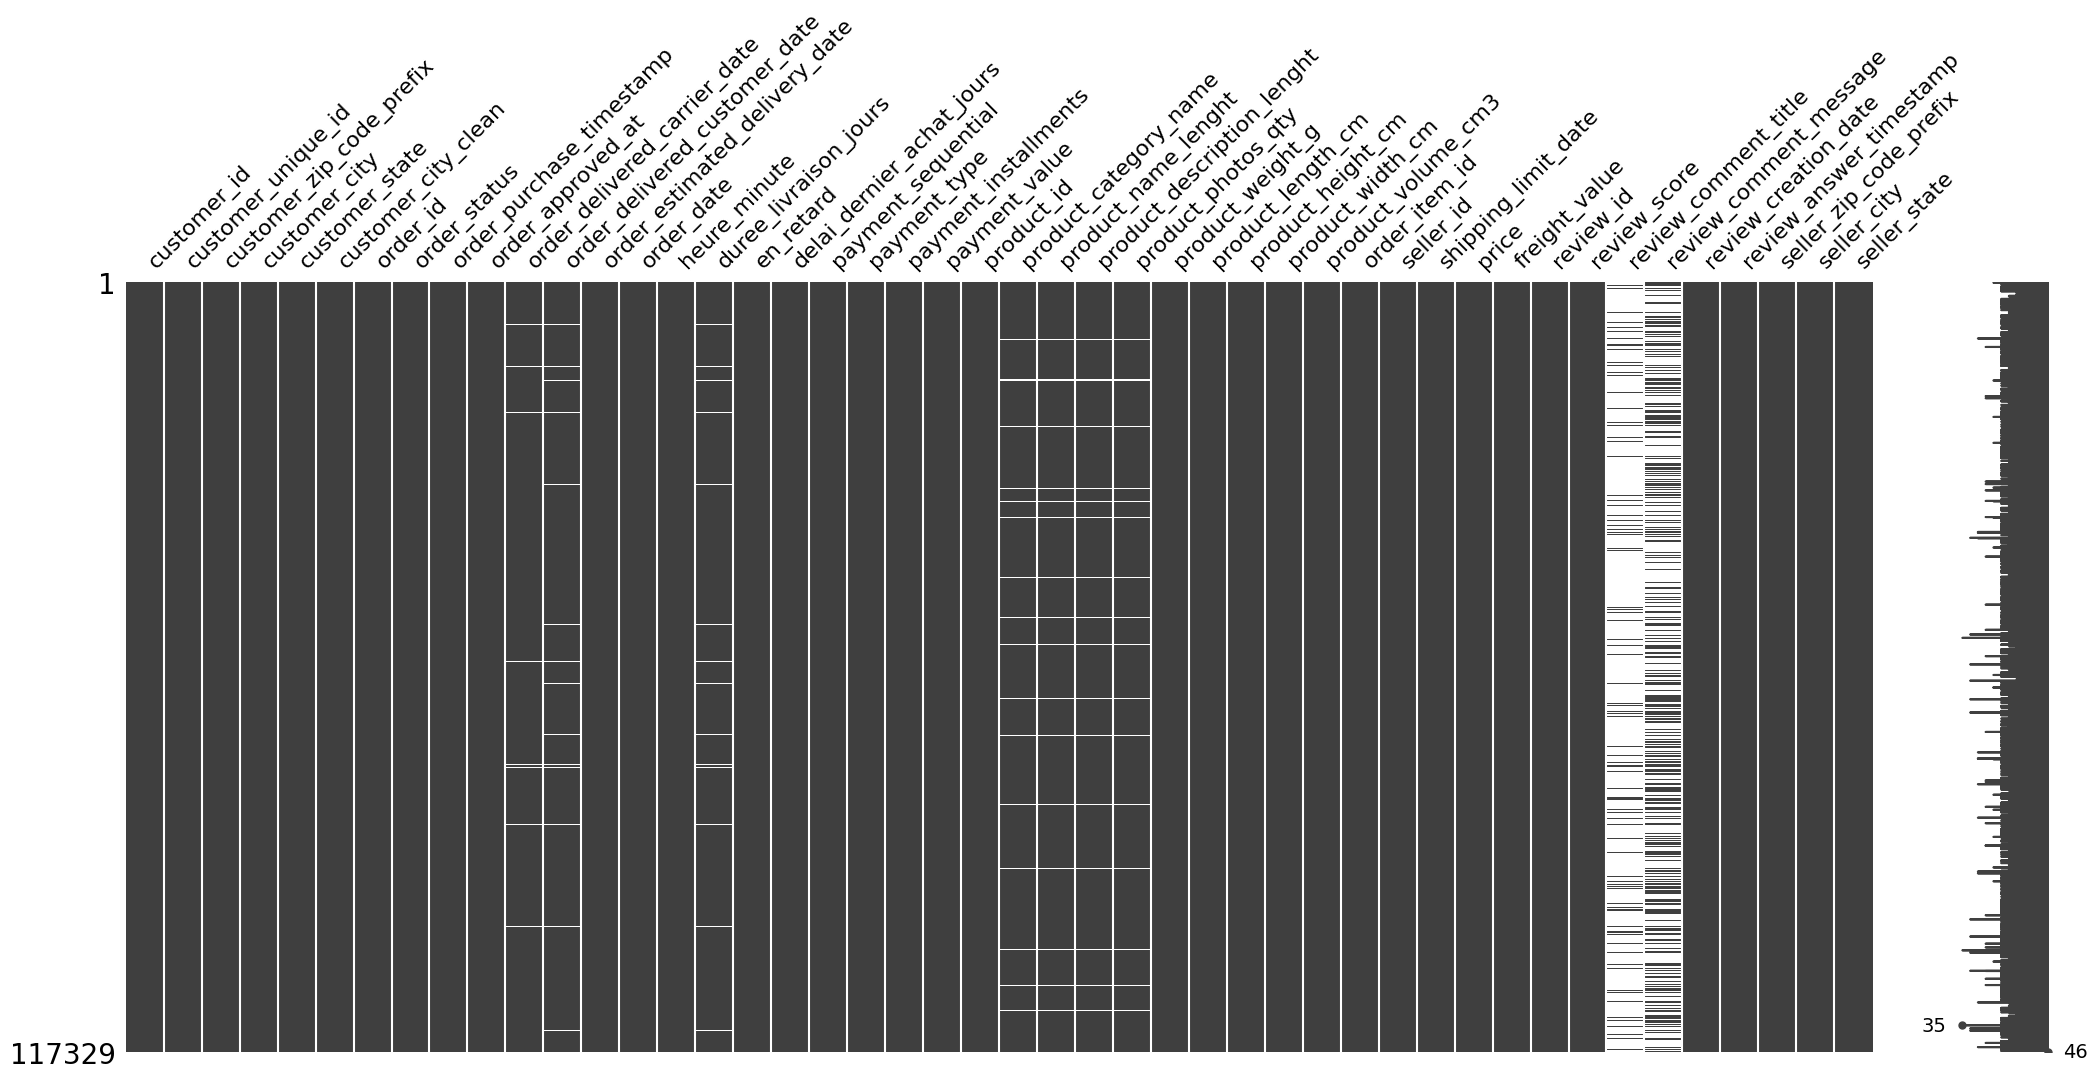

In [186]:
msno.matrix(merged_data)
plt.show()

In [187]:
merged_data.isnull().mean()*100

customer_id                       0.000000
customer_unique_id                0.000000
customer_zip_code_prefix          0.000000
customer_city                     0.000000
customer_state                    0.000000
customer_city_clean               0.000000
order_id                          0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.012785
order_delivered_carrier_date      1.052596
order_delivered_customer_date     2.106044
order_estimated_delivery_date     0.000000
order_date                        0.000000
heure_minute                      0.000000
duree_livraison_jours             2.118828
en_retard                         0.000000
delai_dernier_achat_jours         0.000000
payment_sequential                0.000000
payment_type                      0.000000
payment_installments              0.000000
payment_value                     0.000000
product_id                        0.000000
product_cat

- **Puisque les deux colonnes {review_comment_title et review_comment_message} contiennent plus de 50 % de valeurs nulles, nous les supprimons afin d'éviter une perte excessive de données.**

In [188]:
merged_data.drop(['review_comment_title','review_comment_message'],axis=1,inplace=True)

In [189]:
merged_data.shape

(117329, 44)

- **Puisqu'il y a seulement 0,01 % à 2 % de valeurs nulles dans certaines colonnes, nous supprimons les lignes contenant ces valeurs nulles.**

In [190]:
merged_data.dropna(inplace=True)

In [191]:
merged_data.shape

(113216, 44)

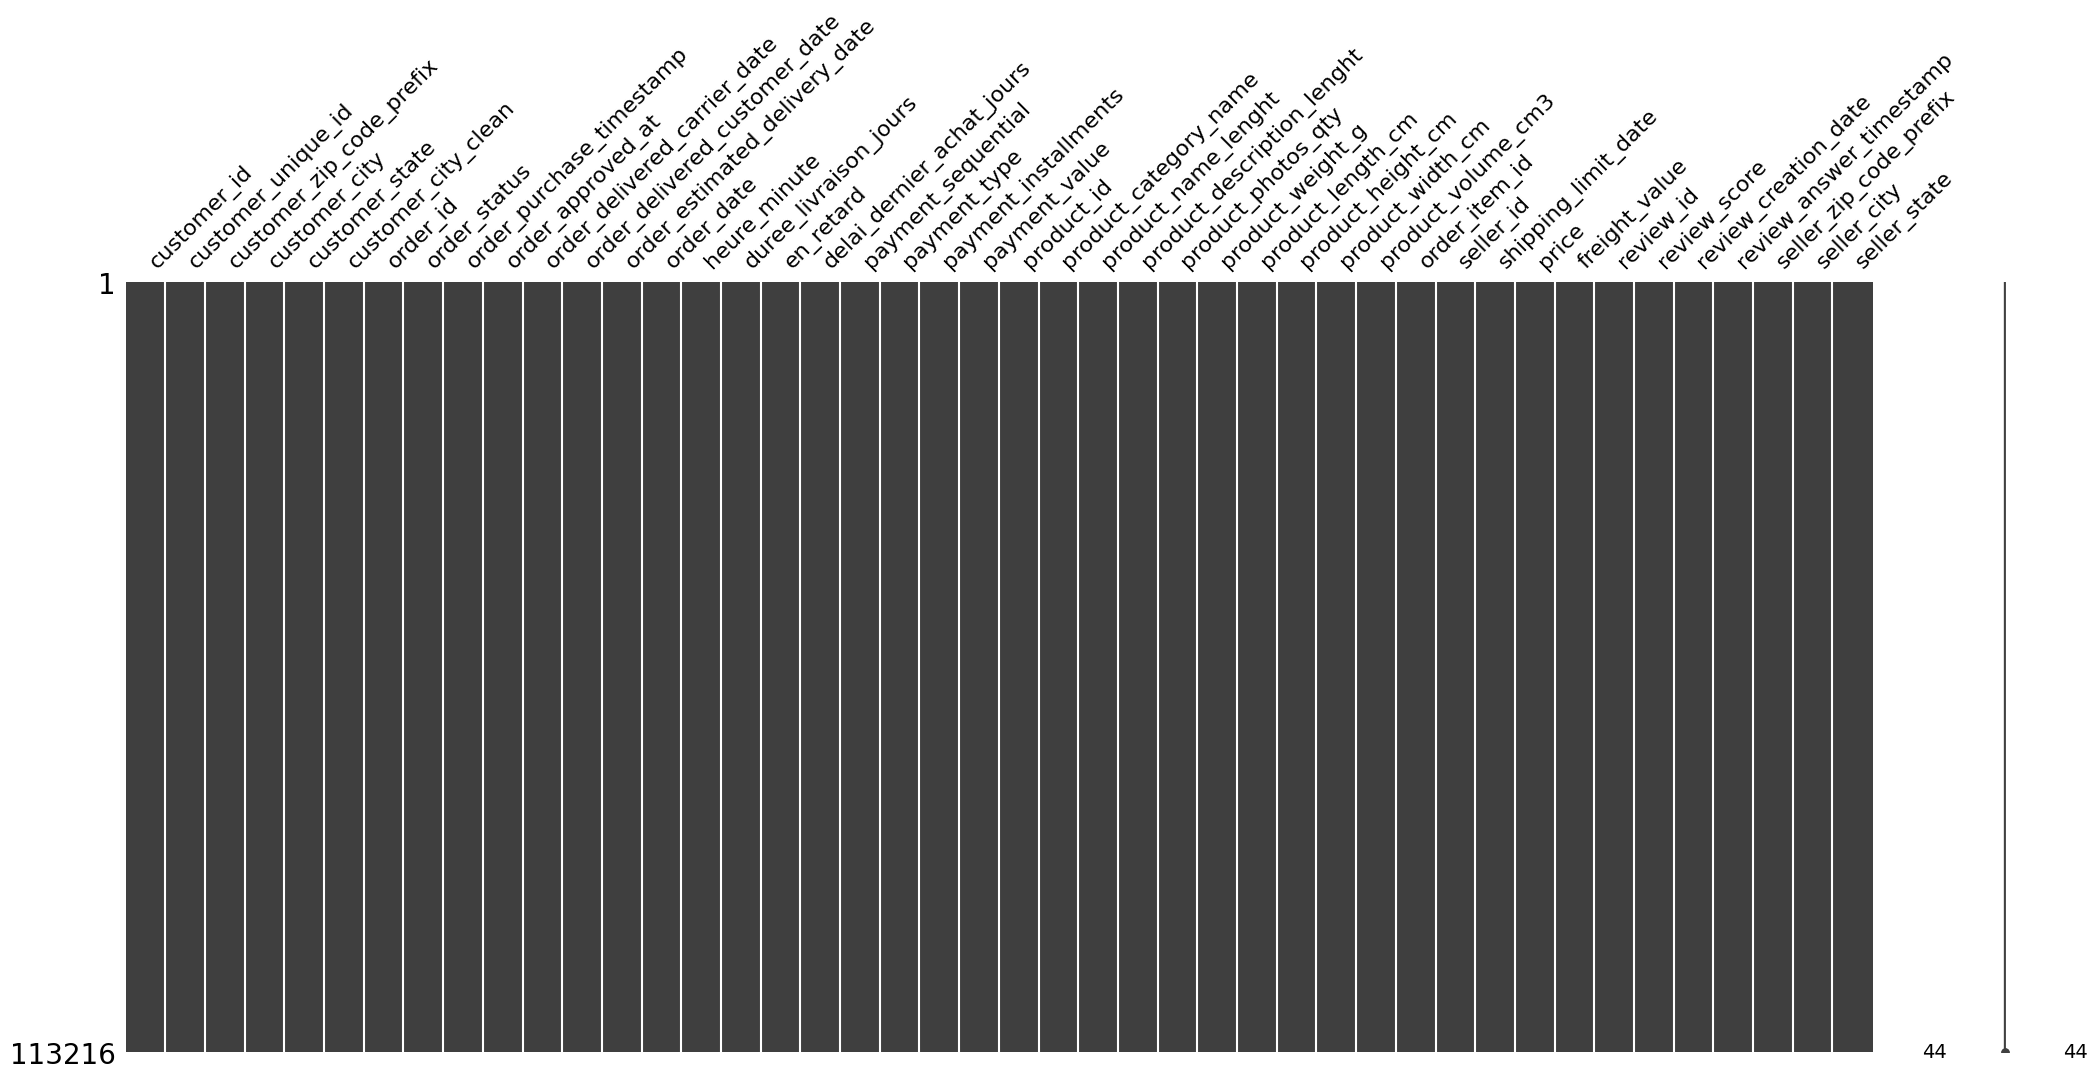

In [192]:
msno.matrix(merged_data)
plt.show()

- **La suppression des colonnes inutiles, comme celles contenant les IDs et les codes postaux.**

In [193]:
merged_data.drop(columns=['seller_id', 'customer_id', 'order_id', 'product_id','seller_zip_code_prefix', 'customer_zip_code_prefix'], inplace=True)

In [194]:
merged_data.shape

(113216, 38)

In [195]:
# Calculer le nombre de commandes par client unique et créer un DataFrame avec ces informations
commandes_par_client = merged_data['customer_unique_id'].value_counts().to_frame().reset_index()
# Renommer les colonnes pour une meilleure clarté
commandes_par_client.columns = ['customer_unique_id', 'Nombre_de_commande']

# Fusionner le DataFrame original avec le DataFrame des commandes par client unique pour ajouter la colonne NumberOfOrders
merged_data = pd.merge(merged_data, commandes_par_client, on='customer_unique_id', how='inner')

# Afficher les premières lignes du DataFrame mis à jour pour vérifier le résultat
merged_data.head()

,customer_unique_id,customer_city,customer_state,customer_city_clean,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_date,heure_minute,duree_livraison_jours,en_retard,delai_dernier_achat_jours,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,order_item_id,shipping_limit_date,price,freight_value,review_id,review_score,review_creation_date,review_answer_timestamp,seller_city,seller_state,Nombre_de_commande
0,861eff4711a542e4b93843c6dd7febb0,franca,São Paulo,franca,delivered,2017-05-16 15:05:35,2017-05-16,2017-05-23 10:47:57,2017-05-25,2017-06-05,2017-05-16,15,9.0,False,666,1,credit_card,2,146.87,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,107136.0,1,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,itaquaquecetuba,São Paulo,1
1,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,São Paulo,saobernardodocampo,delivered,2018-01-12 20:48:24,2018-01-12,2018-01-15 17:14:59,2018-01-29,2018-02-06,2018-01-12,20,17.0,False,425,1,credit_card,8,335.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,53400.0,1,2018-01-18 20:58:32,289.00,46.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,2018-01-30 00:00:00,2018-02-10 22:43:29,itajai,Santa Catarina,1
2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,São Paulo,saopaulo,delivered,2018-05-19 16:07:45,2018-05-20,2018-06-11 14:31:00,2018-06-14,2018-06-13,2018-05-19,16,25.0,True,298,1,credit_card,7,157.73,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,45968.0,1,2018-06-05 16:19:10,139.94,17.79,5ad6695d76ee186dc473c42706984d87,5,2018-06-15 00:00:00,2018-06-15 12:10:59,itaquaquecetuba,São Paulo,1
3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,São Paulo,mogidascruzes,delivered,2018-03-13 16:06:38,2018-03-13,2018-03-27 23:22:42,2018-03-28,2018-04-10,2018-03-13,16,15.0,False,365,1,credit_card,1,173.30,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,79968.0,1,2018-03-27 16:31:16,149.94,23.36,059a801bb31f6aab2266e672cab87bc5,5,2018-03-29 00:00:00,2018-04-02 18:36:47,itaquaquecetuba,São Paulo,1
4,345ecd01c38d18a9036ed96c73b8d066,campinas,São Paulo,campinas,delivered,2018-07-29 09:51:30,2018-07-29,2018-07-30 15:16:00,2018-08-09,2018-08-15,2018-07-29,09,11.0,False,227,1,credit_card,8,252.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,23625.0,1,2018-07-31 10:10:09,230.00,22.25,8490879d58d6c5d7773f2739a03f089a,5,2018-08-10 00:00:00,2018-08-17 01:59:52,ibitinga,São Paulo,1


In [196]:
merged_data['Nombre_de_commande'].value_counts()

Nombre_de_commande
1     77746
2     20046
3      5823
4      3692
6      1704
5      1625
7       469
8       360
12      300
10      240
9       216
11      187
24      168
14      126
15       90
75       75
21       63
20       60
13       52
38       38
35       35
26       26
22       22
19       19
18       18
16       16
Name: count, dtype: int64

In [197]:
# Filtrer les commandes pour obtenir celles dont le nombre de commandes est différent de 1
acheteurs_plusieurs_commandes = commandes_par_client[commandes_par_client['Nombre_de_commande'] != 1]

# Calculer le pourcentage d'acheteurs ayant commandé plusieurs fois
pourcentage = round((len(acheteurs_plusieurs_commandes) / len(commandes_par_client)) * 100, 2)

# Afficher le résultat
display(Markdown(f"- **{pourcentage} %** des acheteurs ont passé plusieurs commandes sur le site internet."))

- **15.02 %** des acheteurs ont passé plusieurs commandes sur le site internet.

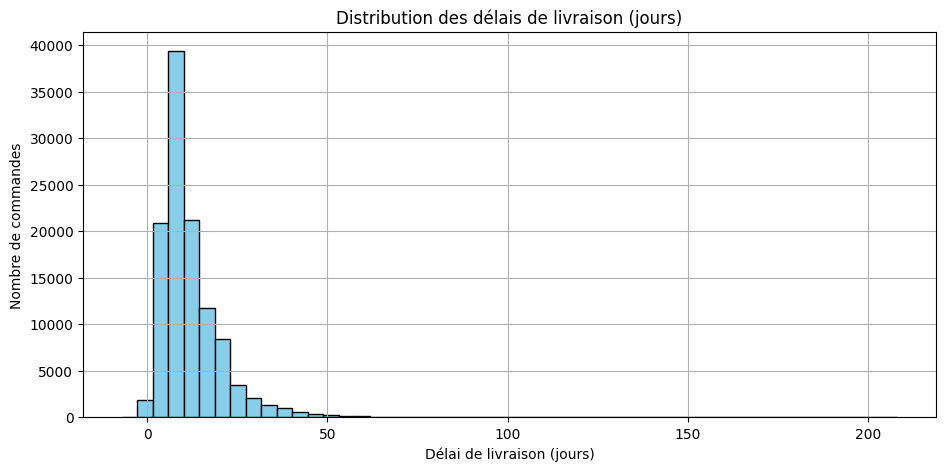

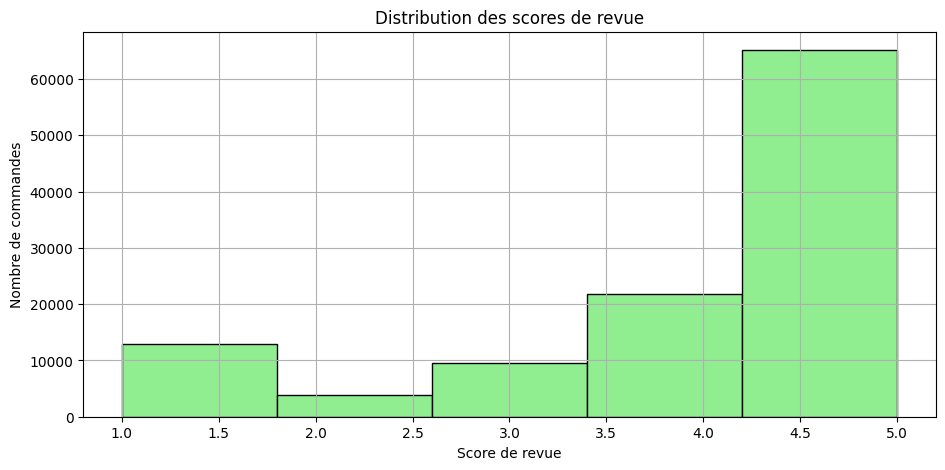

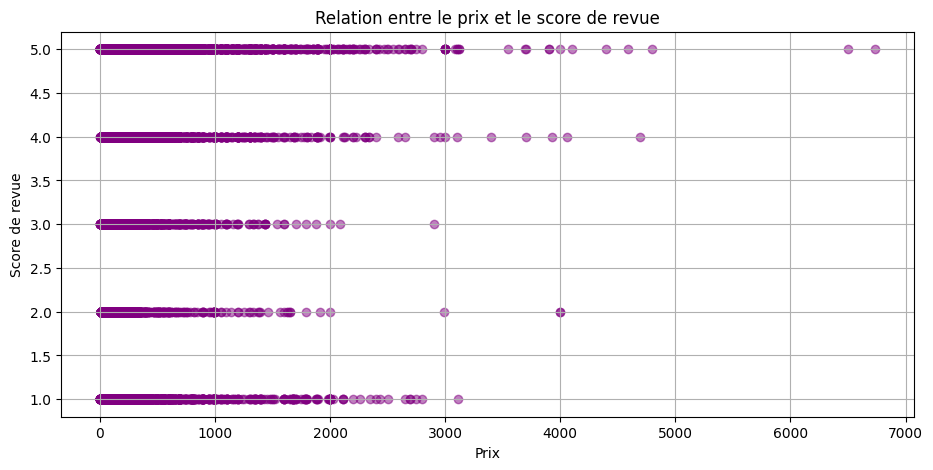

In [198]:
# Distribution des délais de livraison
plt.figure(figsize=(11, 5))
plt.hist(merged_data['duree_livraison_jours'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution des délais de livraison (jours)')
plt.xlabel('Délai de livraison (jours)')
plt.ylabel('Nombre de commandes')
plt.grid(True)
plt.show()

# Distribution des scores de revue
plt.figure(figsize=(11, 5))
plt.hist(merged_data['review_score'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Distribution des scores de revue')
plt.xlabel('Score de revue')
plt.ylabel('Nombre de commandes')
plt.grid(True)
plt.show()

# Relation entre le prix et le score de revue
plt.figure(figsize=(11, 5))
plt.scatter(merged_data['price'], merged_data['review_score'], alpha=0.5, c='purple')
plt.title('Relation entre le prix et le score de revue')
plt.xlabel('Prix')
plt.ylabel('Score de revue')
plt.grid(True)
plt.show()

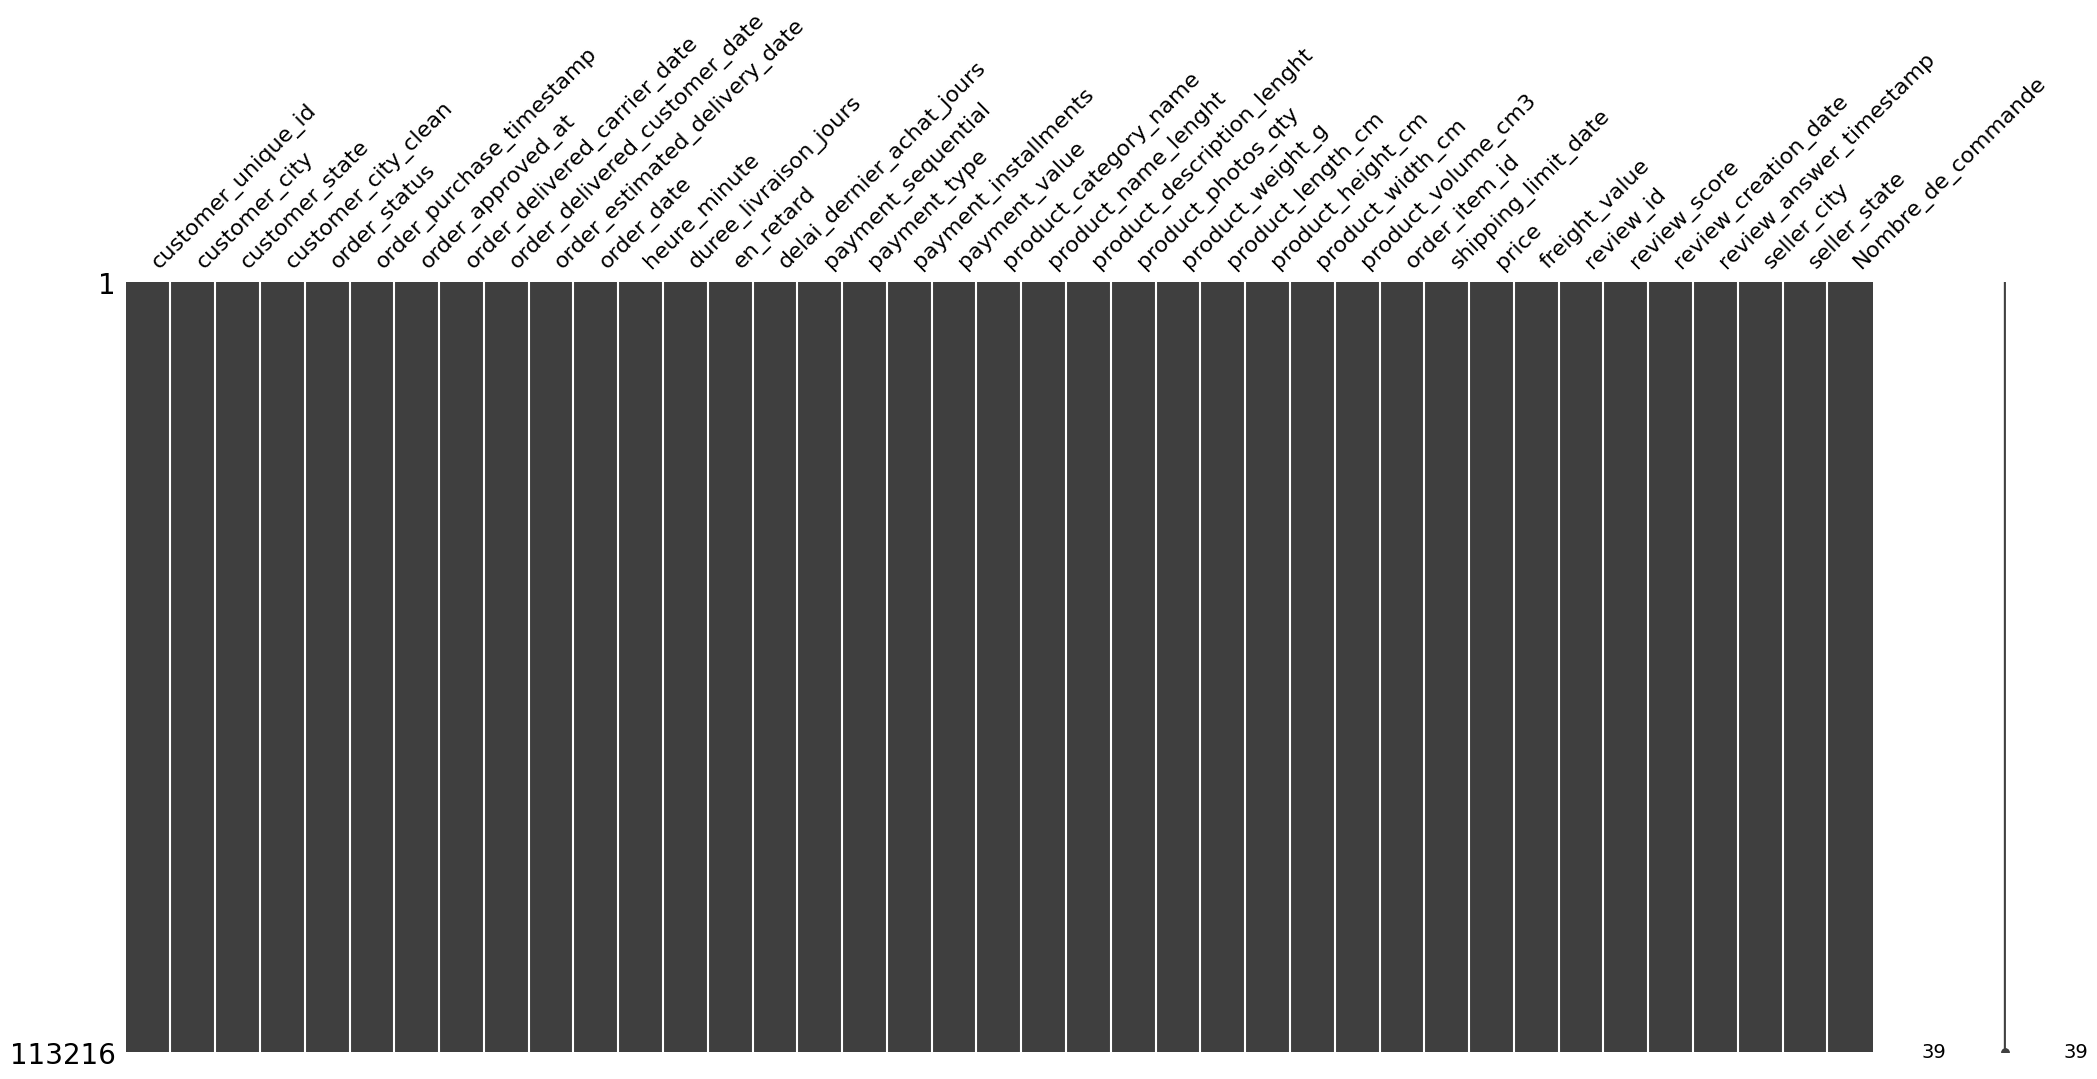

In [199]:
msno.matrix(merged_data)
plt.show()

- **La suppresion des colonnes des coordonnes**

In [200]:
merged_data.drop(['customer_state', 'seller_state', 'customer_city'],axis=1,inplace=True)

- **Ajout d'une colonne totale avec un nom plus explicite en utilisant apply avec une fonction lambda**

In [201]:
merged_data['CoutTotalAvecFraisDeLivraison'] = merged_data.apply(lambda row: row['price'] + row['freight_value'], axis=1)

In [202]:
# Définir les colonnes à normaliser
cols_to_scale = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']

# Initialiser le scaler et ajuster les données
scaler = MinMaxScaler()
merged_data[cols_to_scale] = scaler.fit_transform(merged_data[cols_to_scale])

# Calculer le score de présentation du produit
merged_data['ScorePresentationProduit'] = round(merged_data['product_photos_qty'] + merged_data['product_description_lenght'] + 1 / merged_data['product_name_lenght'], 2)

# Supprimer les colonnes originales utilisées pour le calcul
merged_data.drop(columns=cols_to_scale, inplace=True)

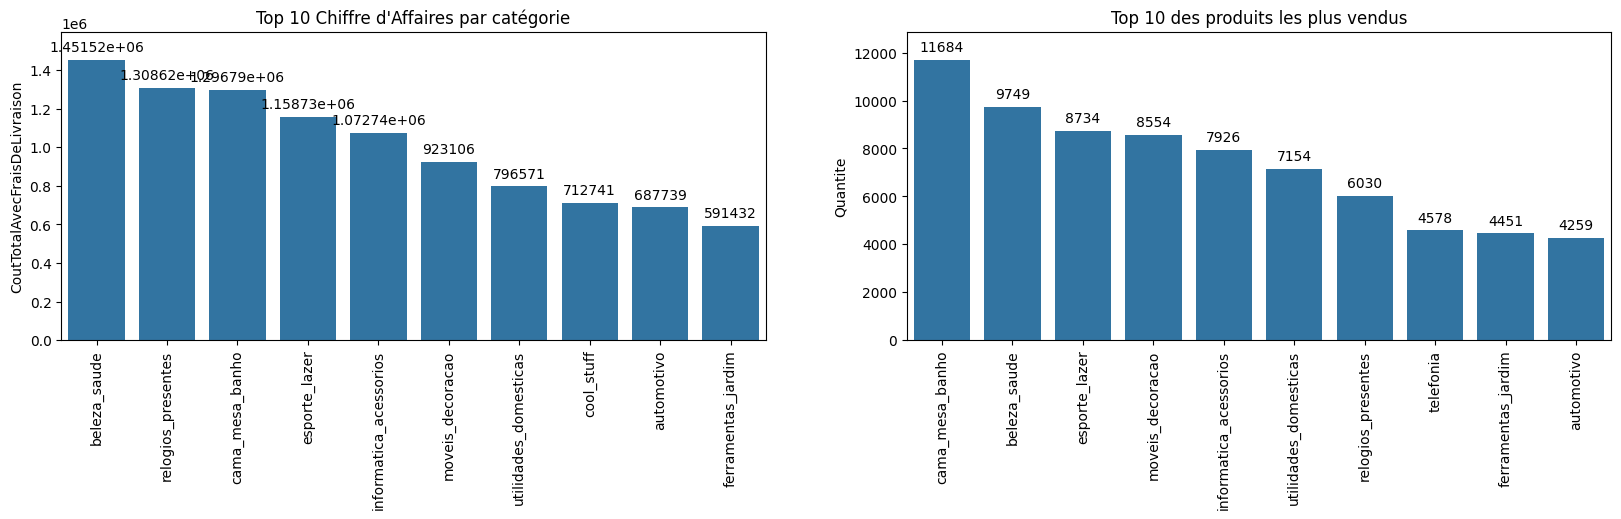

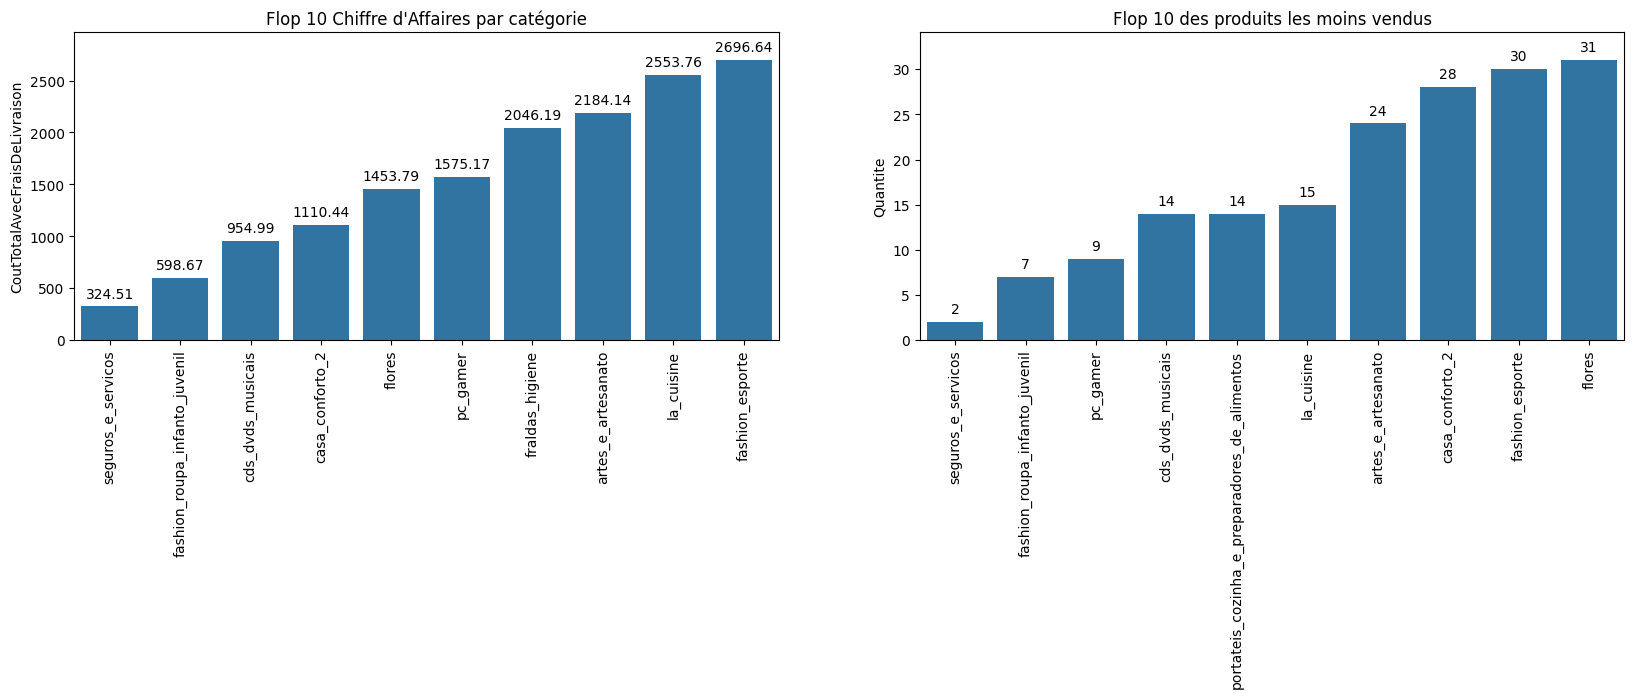

In [203]:
# Agréger les données par catégorie de produit
categories = merged_data.groupby('product_category_name').agg({
    'CoutTotalAvecFraisDeLivraison': 'sum', 
    'duree_livraison_jours': 'count'
}).rename(columns={'duree_livraison_jours': 'Quantite'}).sort_values('CoutTotalAvecFraisDeLivraison', ascending=False)

# Représentation graphique : Top 10 des catégories par chiffre d'affaires
plt.subplots(1, 2, figsize=(20, 4))

# Graphique du Top 10 des catégories par chiffre d'affaires
plt.subplot(121)
ax1 = sns.barplot(x=categories.head(10).index, y=categories['CoutTotalAvecFraisDeLivraison'].head(10))
ax1.bar_label(ax1.containers[0], padding=4)
plt.title('Top 10 Chiffre d\'Affaires par catégorie')
plt.xticks(rotation=90)
plt.xlabel('')
ax1.margins(y=0.1)

# Graphique du Top 10 des produits les plus vendus
plt.subplot(122)
categories = categories.sort_values('Quantite', ascending=False)
ax2 = sns.barplot(x=categories.head(10).index, y=categories['Quantite'].head(10))
ax2.bar_label(ax2.containers[0], padding=4)
plt.title('Top 10 des produits les plus vendus')
plt.xticks(rotation=90)
plt.xlabel('')
ax2.margins(y=0.1)

plt.show()

# Représentation graphique : Flop 10 des catégories par chiffre d'affaires
plt.subplots(1, 2, figsize=(20, 4))

# Graphique du Flop 10 des catégories par chiffre d'affaires
plt.subplot(121)
categories = categories.sort_values('CoutTotalAvecFraisDeLivraison', ascending=True)
ax3 = sns.barplot(x=categories.head(10).index, y=categories['CoutTotalAvecFraisDeLivraison'].head(10))
ax3.bar_label(ax3.containers[0], padding=4)
plt.title('Flop 10 Chiffre d\'Affaires par catégorie')
plt.xticks(rotation=90)
plt.xlabel('')
ax3.margins(y=0.1)

# Graphique du Top 10 des produits les moins vendus
plt.subplot(122)
categories = categories.sort_values('Quantite', ascending=True)
ax4 = sns.barplot(x=categories.head(10).index, y=categories['Quantite'].head(10))
ax4.bar_label(ax4.containers[0], padding=4)
plt.title('Flop 10 des produits les moins vendus')
plt.xticks(rotation=90)
plt.xlabel('')
ax4.margins(y=0.1)

plt.show()

In [204]:
# Normalisation des variables de volume et de poids
scaler = MinMaxScaler()

# Sélection des colonnes à normaliser
cols_to_scale = ['product_volume_cm3', 'product_weight_g']

# Ajuster et transformer les données
scaler.fit(merged_data[cols_to_scale])
scaled_values = scaler.transform(merged_data[cols_to_scale])

# Création d'un DataFrame pour les valeurs normalisées
normalized_data = pd.DataFrame(scaled_values, columns=cols_to_scale)

# Calculer le score d'encombrement en additionnant le volume et le poids normalisés
normalized_data['ScoreEncombrement'] = normalized_data['product_volume_cm3'] + normalized_data['product_weight_g']

# Fusionner le score d'encombrement avec les données initiales
merged_data = merged_data.join(normalized_data['ScoreEncombrement'])

# Supprimer les colonnes originales de volume et de poids
merged_data.drop(columns=['product_volume_cm3', 'product_weight_g'], inplace=True)

In [208]:
# Agrégation des données par client unique
Data_Final = merged_data.groupby('customer_unique_id').agg({
    'duree_livraison_jours': 'mean',             # Délai moyen de livraison
    'en_retard': 'mean',            # Retard moyen de livraison
    'delai_dernier_achat_jours': 'min',          # Délai minimum depuis le dernier achat
    'payment_installments': 'mean',                # Nombre moyen de paiements
    'price': 'mean',                             # Prix moyen des produits
    'freight_value': 'mean',                     # Valeur moyenne des frais de port
    'review_score': 'mean',                      # Note moyenne des avis
    'Nombre_de_commande': 'max',                 # Nombre maximum de commandes
    #'distance_km': 'mean',                       # Distance moyenne en kilomètres
    'CoutTotalAvecFraisDeLivraison': 'mean'      # Coût total moyen avec frais de livraison
})

# Réinitialisation des index pour obtenir un DataFrame ordinaire
Data_Final.reset_index(inplace=True)

In [209]:
# Renommage des colonnes du DataFrame final
nouveaux_noms_colonnes = [
    'customer_unique_id',
    'Delais_livraison_jours', 'en_retard', 
    'Delais_dernier_achat_jours', 'Nombre_de_Paiement', 
    'PrixCommandeMoyen', 'FraisDeLivraisonMoyen', 
    'ScoreCommentaireMoyen', 'Nombre_de_commande',
    'CoutTotalAvecFraisDeLivraison'              # 'Distance_km'
]

Data_Final.columns = nouveaux_noms_colonnes

In [210]:
Data_Final.head()

,customer_unique_id,Delais_livraison_jours,en_retard,Delais_dernier_achat_jours,Nombre_de_Paiement,PrixCommandeMoyen,FraisDeLivraisonMoyen,ScoreCommentaireMoyen,Nombre_de_commande,CoutTotalAvecFraisDeLivraison
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0,0.0,307,8.0,129.90,12.00,5.0,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0,0.0,310,1.0,18.90,8.29,4.0,1,27.19
2,0000f46a3911fa3c0805444483337064,26.0,0.0,733,8.0,69.00,17.22,3.0,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,20.0,0.0,517,4.0,25.99,17.63,4.0,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,13.0,0.0,484,6.0,180.00,16.89,5.0,1,196.89


In [213]:
# Conversion des colonnes spécifiées en type entier
colonnes_a_convertir = ['Delais_livraison_jours', 'en_retard', 'Nombre_de_Paiement', 'ScoreCommentaireMoyen']
                                                                                                      # , 'Distance_km'
Data_Final[colonnes_a_convertir] = Data_Final[colonnes_a_convertir].astype(int)

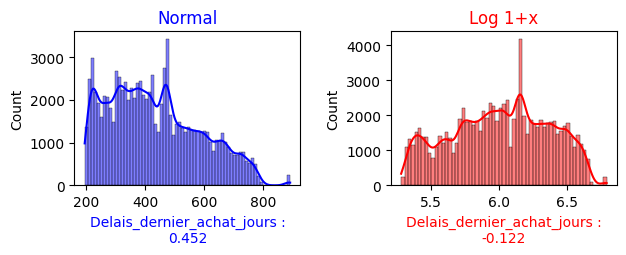

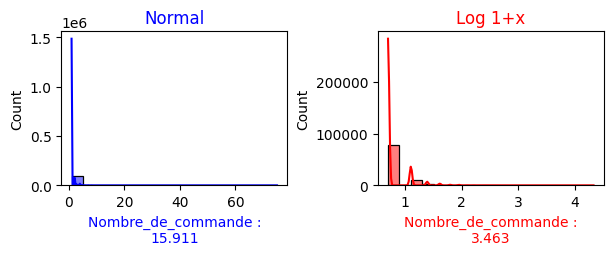

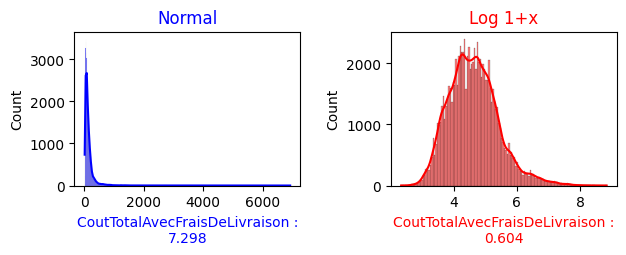

In [214]:
from scipy.stats import skew

# Liste des colonnes à analyser
colonnes_a_analyser = ['Delais_dernier_achat_jours', 'Nombre_de_commande', 'CoutTotalAvecFraisDeLivraison']

# Boucle sur chaque colonne pour créer les histogrammes
for colonne in colonnes_a_analyser:
    fig, ax = plt.subplots(1, 2, figsize=(7, 2))  # Taille ajustée pour une meilleure lisibilité
    
    # Histogramme de la distribution normale
    ax[0].set_title('Normal', color='blue')
    sns.histplot(Data_Final[colonne], color="blue", kde=True, ax=ax[0])
    skewness_normal = round(skew(Data_Final[colonne].to_list()), 3)
    ax[0].set_xlabel(f'{colonne} :\n{skewness_normal}', color='blue')
    
    # Histogramme de la distribution log-transformée
    ax[1].set_title('Log 1+x', color='red')
    sns.histplot(np.log1p(Data_Final[colonne]), color="red", kde=True, ax=ax[1])
    skewness_log = round(skew(np.log1p(Data_Final[colonne]).to_list()), 3)
    ax[1].set_xlabel(f'{colonne} :\n{skewness_log}', color='red')
    
    # Ajuster l'espace entre les sous-graphiques
    plt.subplots_adjust(wspace=0.4)
    plt.show()

In [215]:
# Transformation log des variables spécifiées
variables_a_transformer = ['CoutTotalAvecFraisDeLivraison']

# Créer les nouvelles colonnes log-transformées
for var in variables_a_transformer:
    Data_Final[f'{var}(log)'] = np.log1p(Data_Final[var])

In [217]:
Data_Final.head()

,customer_unique_id,Delais_livraison_jours,en_retard,Delais_dernier_achat_jours,Nombre_de_Paiement,PrixCommandeMoyen,FraisDeLivraisonMoyen,ScoreCommentaireMoyen,Nombre_de_commande,CoutTotalAvecFraisDeLivraison,CoutTotalAvecFraisDeLivraison(log)
0,0000366f3b9a7992bf8c76cfdf3221e2,6,0,307,8,129.90,12.00,5,1,141.90,4.962145
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3,0,310,1,18.90,8.29,4,1,27.19,3.338967
2,0000f46a3911fa3c0805444483337064,26,0,733,8,69.00,17.22,3,1,86.22,4.468434
3,0000f6ccb0745a6a4b88665a16c9f078,20,0,517,4,25.99,17.63,4,1,43.62,3.798182
4,0004aac84e0df4da2b147fca70cf8255,13,0,484,6,180.00,16.89,5,1,196.89,5.287711


In [216]:
Data_Final.shape

(91484, 11)

In [218]:
Data_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91484 entries, 0 to 91483
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   customer_unique_id                  91484 non-null  object 
 1   Delais_livraison_jours              91484 non-null  int64  
 2   en_retard                           91484 non-null  int64  
 3   Delais_dernier_achat_jours          91484 non-null  int64  
 4   Nombre_de_Paiement                  91484 non-null  int64  
 5   PrixCommandeMoyen                   91484 non-null  float64
 6   FraisDeLivraisonMoyen               91484 non-null  float64
 7   ScoreCommentaireMoyen               91484 non-null  int64  
 8   Nombre_de_commande                  91484 non-null  int64  
 9   CoutTotalAvecFraisDeLivraison       91484 non-null  float64
 10  CoutTotalAvecFraisDeLivraison(log)  91484 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory

In [219]:
Data_Final.describe()

,Delais_livraison_jours,en_retard,Delais_dernier_achat_jours,Nombre_de_Paiement,PrixCommandeMoyen,FraisDeLivraisonMoyen,ScoreCommentaireMoyen,Nombre_de_commande,CoutTotalAvecFraisDeLivraison,CoutTotalAvecFraisDeLivraison(log)
count,91484.000000,91484.000000,91484.000000,91484.000000,91484.000000,91484.000000,91484.000000,91484.00000,91484.000000,91484.000000
mean,11.938437,0.065542,432.643435,2.895588,125.695736,20.212601,4.150354,1.23755,145.908337,4.625482
std,9.433890,0.247480,152.597683,2.677991,188.714866,15.732224,1.281515,0.84433,195.897853,0.779460
min,-7.000000,0.000000,196.000000,0.000000,0.850000,0.000000,1.000000,1.00000,9.341429,2.336158
25%,6.000000,0.000000,309.000000,1.000000,42.900000,13.370000,4.000000,1.00000,57.780000,4.073802
50%,10.000000,0.000000,413.000000,2.000000,79.000000,16.430000,5.000000,1.00000,96.330000,4.578107
75%,15.000000,0.000000,541.000000,4.000000,139.900000,21.220000,5.000000,1.00000,162.830000,5.098829
max,208.000000,1.000000,891.000000,24.000000,6735.000000,409.680000,5.000000,75.00000,6929.310000,8.843660


- **Le chargement des donnes**

In [222]:
Data_Final.to_csv("Data_Final_cleaning_projet_5.csv", index=False)